In [1]:
cd /deac/phy/salsburyGrp/wud18/md/TM_mutant/pca/

/deac/phy/salsburyGrp/wud18/md/TM_mutant/pca


In [2]:
import pyemma
pyemma.__version__

'2.5.11'

In [3]:
import os
%pylab inline
matplotlib.rcParams.update({'font.size': 18})
pylab.rcParams['figure.figsize'] = (14, 11)
cwd = os.getcwd()

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
from pyemma import config
import mdtraj as md
#import hdbscan
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
sns.set_style("ticks",{"xtick.direction": "in","ytick.direction": "in"})
import numpy as np

In [5]:
stride=1
topfile = '/deac/phy/salsburyGrp/wud18/md/TM_mutant/protein_common_atom.pdb'
topology = md.load(topfile).topology
trajfile = '/deac/phy/salsburyGrp/wud18/md/TM_mutant/thrombin_TM456_WE_TM456_stride' + str(stride) + '_aligned.dcd'

In [6]:
# Catalytic Pockets
feat1 = coor.featurizer(topfile)
s1 = feat1.select("(residue 79 or residue 235 to 241 or residue 261 to 264 or residue 266 or residue 267 or residue 268 or residue 274 or residue 275) and element != 'H'")
s2 = feat1.select("(residue 79 or residue 83 or residue 86 or residue 132 or residue 238 or residue 262 or residue 263) and element != 'H'")
s3 = feat1.select("(residue 86 or residue 263 to 266) and element != 'H'")
s4 = feat1.select("(residue 213 or residue 215 or residue 263 to 265) and element != 'H'")
s5 = feat1.select("(residue 215 or residue 265) and element != 'H'")
s6 = feat1.select("(residue 214 to 215) and element != 'H'")
catalyticTriad = feat1.select("(residue 79 or residue 135 or residue 241) and element != 'H'")
catalytic = np.unique(np.concatenate((s1,s2,s3,s4,s5,s6,catalyticTriad)))
print('selection index:\n',catalytic)
print('\nnumber of atoms:\n',len(catalytic))
feat1.add_selection(catalytic)
feat1.describe()[:10]

selection index:
 [1210 1212 1214 1217 1219 1220 1222 1223 1225 1226 1275 1277 1279 1282
 1283 1285 1287 1288 1290 1292 1294 1295 1324 1326 1328 1331 1332 1334
 1336 1337 1338 1340 1342 1344 1346 1347 2146 2148 2150 2153 2155 2159
 2163 2164 2201 2203 2205 2208 2209 2210 2211 2212 3416 3418 3420 3422
 3424 3428 3429 3430 3432 3434 3437 3440 3443 3445 3446 3449 3452 3453
 3454 3456 3458 3460 3464 3467 3471 3472 3764 3766 3768 3771 3772 3773
 3774 3775 3776 3778 3780 3784 3785 3786 3788 3790 3793 3794 3795 3796
 3798 3800 3803 3806 3807 3808 3809 3810 3811 3813 3816 3817 3818 3820
 3822 3825 3826 3827 3828 3829 3830 3832 3834 3837 3839 3840 4146 4148
 4150 4152 4156 4160 4161 4162 4164 4166 4169 4171 4172 4173 4175 4178
 4179 4180 4182 4185 4186 4187 4189 4191 4194 4195 4196 4197 4199 4201
 4204 4205 4206 4207 4208 4295 4297 4300 4301 4302 4304 4306 4309 4310
 4312 4314 4316 4318 4320 4321]

number of atoms:
 174


['ATOM:HIS 79 N 1210 1 x',
 'ATOM:HIS 79 N 1210 1 y',
 'ATOM:HIS 79 N 1210 1 z',
 'ATOM:HIS 79 CA 1212 1 x',
 'ATOM:HIS 79 CA 1212 1 y',
 'ATOM:HIS 79 CA 1212 1 z',
 'ATOM:HIS 79 CB 1214 1 x',
 'ATOM:HIS 79 CB 1214 1 y',
 'ATOM:HIS 79 CB 1214 1 z',
 'ATOM:HIS 79 ND1 1217 1 x']

In [7]:
inp1 = coor.source(trajfile, feat1)
inp1.get_output()
print('trajectory length = ',inp1.trajectory_length(0))
print('number of dimension = ',inp1.dimension())

getting output of FeatureReader:   0%|                         | 0/25 [00:00<?, ?it/s]

trajectory length =  3200000
number of dimension =  522


calc mean+cov:   0%|                                           | 0/25 [00:00<?, ?it/s]

getting output of PCA:   0%|                                   | 0/25 [00:00<?, ?it/s]

[0.25759369 0.11312555 0.08302657 0.06802301 0.06590603]


Text(0, 0.5, 'Variance')

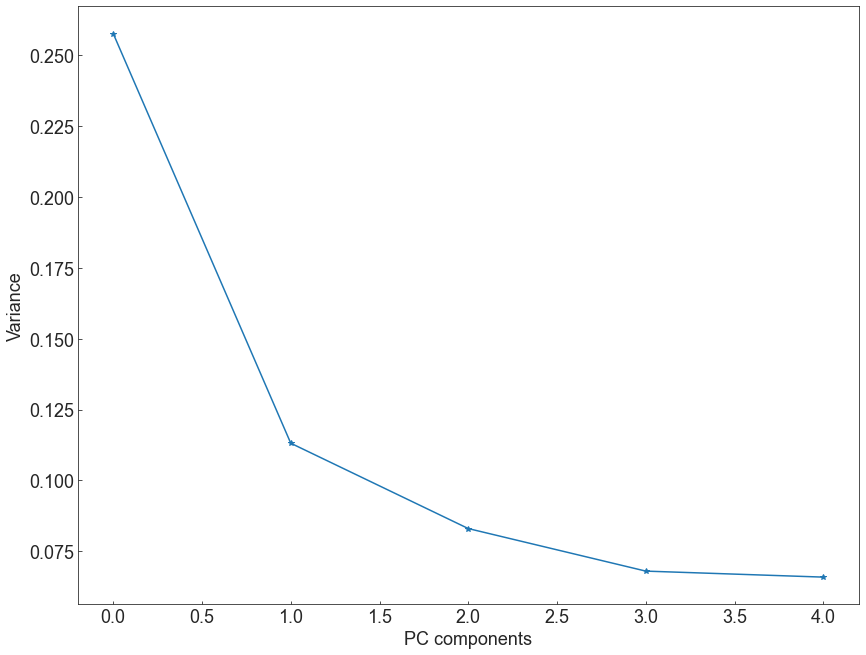

In [8]:
os.chdir(cwd)
directory='./PcaBasisFromAll'
if not os.path.exists(directory):
    os.mkdir(directory)
os.chdir(directory)
pca_obj1 = coor.pca(inp1, var_cutoff=0.95)
Ypca1 = pca_obj1.get_output()[0]
variance1 = pca_obj1.eigenvalues/sum(pca_obj1.eigenvalues)
print(variance1[0:5])
plot(variance1[0:5],'-*')
xlabel('PC components')
ylabel('Variance')

(<Figure size 1008x792 with 2 Axes>, <AxesSubplot:>)

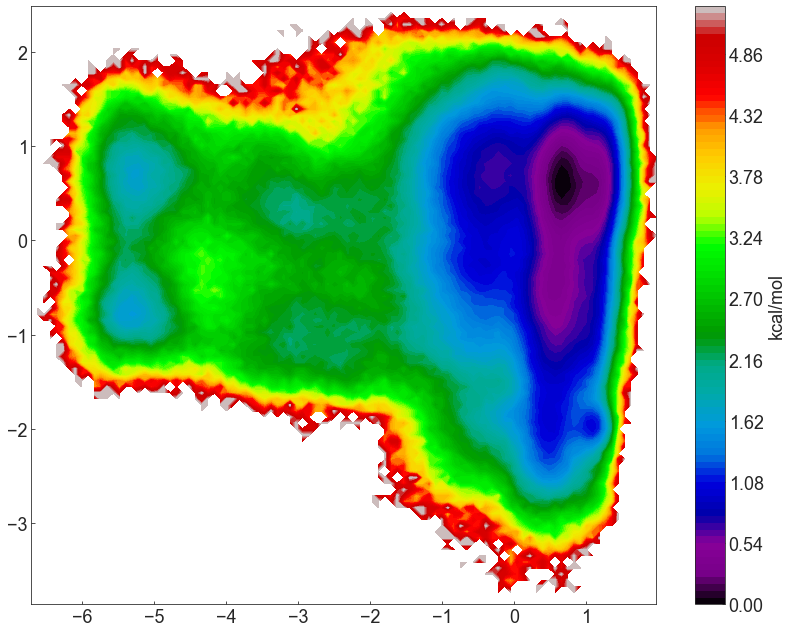

In [9]:
mplt.plot_free_energy(Ypca1[:,0], Ypca1[:,1], kT=0.593, cbar_label='kcal/mol')

In [13]:
path='./catalyticPockets/'
if not os.path.exists(path):
    os.mkdir(path)
pca_obj1.write_to_csv(os.path.join(path,'projection.txt'), '.txt')
np.savetxt(os.path.join(path,'variance.txt'),variance1,delimiter="\n")
np.save(os.path.join(path,'variance.npy'),variance1)
tmp1=np.loadtxt(os.path.join(path,'projection.txt'))
np.save(os.path.join(path,'projection.npy'),tmp1)

saving to csv:   0%|                                           | 0/25 [00:00<?, ?it/s]

In [14]:
# Regulatory Loops
feat2 = coor.featurizer(topfile)
exociteI = feat2.select("(residue 57 or residue 98 or residue 104 or residue 106 or residue 109 or residue 142 to 143) and element != 'H'")
exociteII = feat2.select("(residue 125 or residue 134 or residue 281 or residue 284 or residue 288) and element != 'H'")
gammaLoop = feat2.select("(residue 182 to 190) and element != 'H'")
sodiumLoop = feat2.select("(residue 262 to 274) and element != 'H'")
sixtysLoop = feat2.select("(residue 82 to 91) and element != 'H'")
regulatory = np.unique(np.concatenate((exociteI,exociteII,gammaLoop,sodiumLoop,sixtysLoop)))
print('selection index:\n',regulatory)
print('\nnumber of atoms:\n',len(regulatory))
feat2.add_selection(regulatory)
feat2.describe()[:10]

selection index:
 [ 877  879  881  884  887  890  893  897  898 1256 1258 1260 1263 1265
 1269 1273 1274 1275 1277 1279 1282 1283 1285 1287 1288 1290 1292 1294
 1295 1296 1297 1300 1302 1305 1308 1309 1310 1311 1314 1316 1319 1322
 1323 1324 1326 1328 1331 1332 1334 1336 1337 1338 1340 1342 1344 1346
 1347 1348 1350 1352 1355 1356 1357 1358 1359 1360 1362 1364 1367 1370
 1373 1376 1380 1381 1382 1384 1386 1389 1390 1391 1394 1395 1396 1398
 1400 1403 1404 1406 1408 1410 1412 1414 1415 1416 1418 1420 1422 1424
 1428 1429 1525 1527 1529 1532 1535 1538 1540 1541 1544 1547 1548 1625
 1627 1629 1632 1635 1638 1640 1641 1644 1647 1648 1663 1665 1667 1670
 1673 1676 1678 1679 1682 1685 1686 1723 1725 1727 1730 1733 1736 1738
 1739 1742 1745 1746 2010 2012 2014 2017 2020 2023 2025 2026 2029 2032
 2033 2177 2179 2181 2184 2187 2190 2192 2193 2196 2199 2200 2319 2321
 2323 2326 2329 2332 2335 2339 2340 2341 2343 2345 2348 2351 2354 2357
 2361 2362 2941 2943 2945 2948 2951 2952 2953 2954 2955 295

['ATOM:LYS 57 N 877 1 x',
 'ATOM:LYS 57 N 877 1 y',
 'ATOM:LYS 57 N 877 1 z',
 'ATOM:LYS 57 CA 879 1 x',
 'ATOM:LYS 57 CA 879 1 y',
 'ATOM:LYS 57 CA 879 1 z',
 'ATOM:LYS 57 CB 881 1 x',
 'ATOM:LYS 57 CB 881 1 y',
 'ATOM:LYS 57 CB 881 1 z',
 'ATOM:LYS 57 CG 884 1 x']

In [15]:
inp2 = coor.source(trajfile, feat2)
inp2.get_output()
print('trajectory length = ',inp2.trajectory_length(0))
print('number of dimension = ',inp2.dimension())

getting output of FeatureReader:   0%|                         | 0/52 [00:00<?, ?it/s]

trajectory length =  3200000
number of dimension =  1077


calc mean+cov:   0%|                                           | 0/52 [00:00<?, ?it/s]

getting output of PCA:   0%|                                   | 0/52 [00:00<?, ?it/s]

[0.22384049 0.15336569 0.08189029 0.06696045 0.05803246]


Text(0, 0.5, 'Variance')

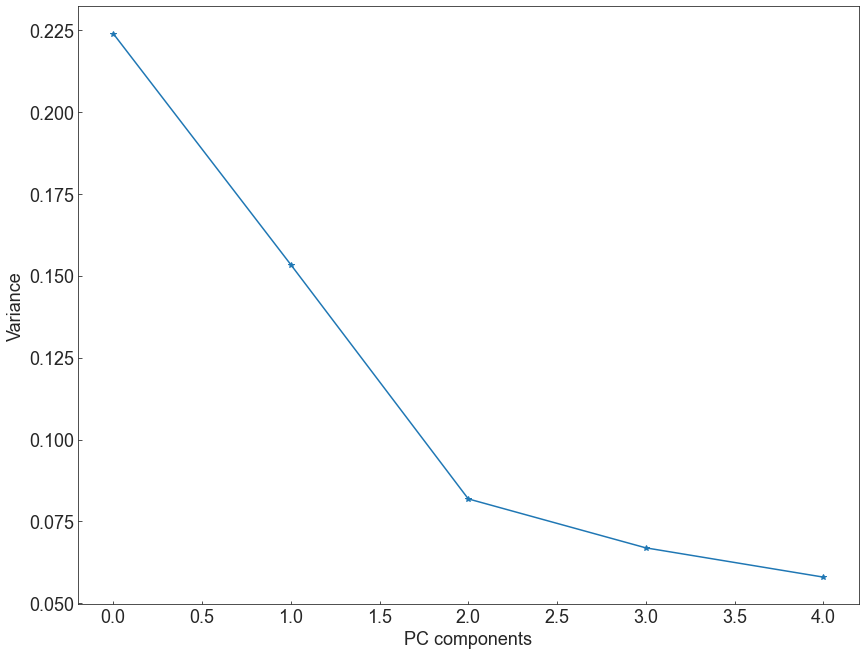

In [16]:
os.chdir(cwd)
directory='./PcaBasisFromAll'
if not os.path.exists(directory):
    os.mkdir(directory)
os.chdir(directory)
pca_obj2 = coor.pca(inp2, var_cutoff=0.95)
Ypca2 = pca_obj2.get_output()[0]
variance2 = pca_obj2.eigenvalues/sum(pca_obj2.eigenvalues)
print(variance2[0:5])
plot(variance2[0:5],'-*')
xlabel('PC components')
ylabel('Variance')

(<Figure size 1008x792 with 2 Axes>, <AxesSubplot:>)

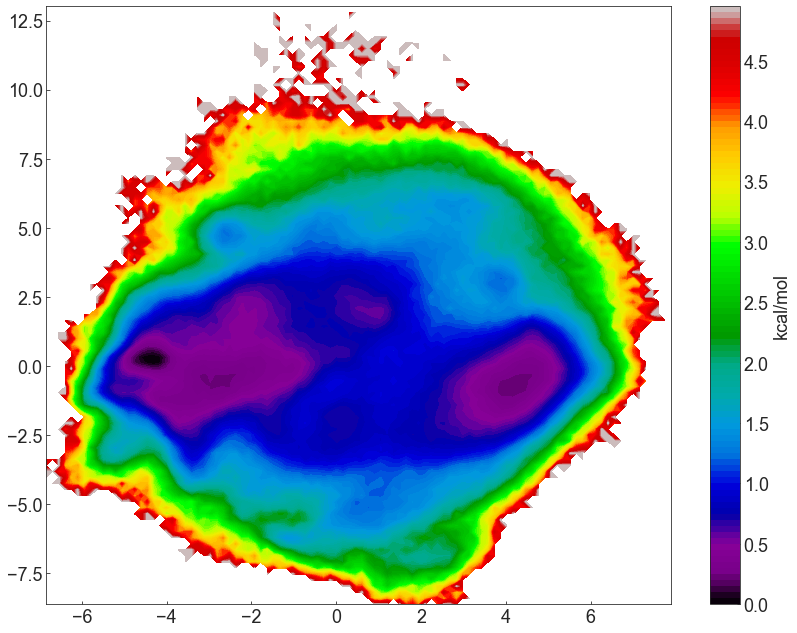

In [17]:
mplt.plot_free_energy(Ypca2[:,0], Ypca2[:,1], kT=0.593, cbar_label='kcal/mol')

In [18]:
path='./regulatoryLoops/'
if not os.path.exists(path):
    os.mkdir(path)
pca_obj2.write_to_csv(os.path.join(path,'projection.txt'), '.txt')
np.savetxt(os.path.join(path,'variance.txt'),variance2,delimiter="\n")
np.save(os.path.join(path,'variance.npy'),variance2)
tmp2=np.loadtxt(os.path.join(path,'projection.txt'))
np.save(os.path.join(path,'projection.npy'),tmp2)

saving to csv:   0%|                                           | 0/52 [00:00<?, ?it/s]

In [19]:
# CA
feat17 = coor.featurizer(topfile)
CA = feat17.select("name CA")
print('selection index:\n',CA)
print('\nnumber of atoms:\n',len(CA))
feat17.add_selection(CA)
feat17.describe()[:10]

selection index:
 [   4   18   38   45   56   63   78   88  100  110  117  136  162  174
  193  213  228  250  272  283  302  317  329  351  365  380  404  419
  438  457  472  483  504  523  535  542  569  588  604  619  626  637
  649  659  674  693  700  717  730  742  766  783  799  816  835  855
  879  901  914  926  943  958  977  996 1006 1013 1023 1034 1053 1072
 1083 1095 1119 1143 1159 1178 1192 1202 1212 1229 1239 1258 1277 1300
 1314 1326 1350 1362 1384 1398 1418 1432 1447 1461 1473 1492 1511 1527
 1551 1570 1577 1599 1616 1627 1651 1665 1689 1710 1725 1749 1763 1782
 1797 1819 1838 1849 1866 1885 1900 1922 1941 1962 1981 2000 2012 2036
 2057 2071 2095 2119 2134 2148 2167 2179 2203 2215 2234 2244 2263 2280
 2302 2321 2343 2367 2379 2395 2405 2425 2436 2448 2469 2488 2507 2519
 2535 2545 2566 2578 2590 2614 2629 2643 2653 2663 2674 2693 2712 2729
 2739 2746 2767 2789 2796 2820 2836 2850 2857 2881 2888 2902 2921 2943
 2958 2972 2996 3010 3020 3034 3050 3057 3079 3086 3105 311

['ATOM:THR 1 CA 4 0 x',
 'ATOM:THR 1 CA 4 0 y',
 'ATOM:THR 1 CA 4 0 z',
 'ATOM:PHE 2 CA 18 0 x',
 'ATOM:PHE 2 CA 18 0 y',
 'ATOM:PHE 2 CA 18 0 z',
 'ATOM:GLY 3 CA 38 0 x',
 'ATOM:GLY 3 CA 38 0 y',
 'ATOM:GLY 3 CA 38 0 z',
 'ATOM:SER 4 CA 45 0 x']

In [20]:
inp17 = coor.source(trajfile, feat17)
inp17.get_output()
print('trajectory length = ',inp17.trajectory_length(0))
print('number of dimension = ',inp17.dimension())

getting output of FeatureReader:   0%|                         | 0/42 [00:00<?, ?it/s]

trajectory length =  3200000
number of dimension =  879


In [23]:
# 60s Loop
feat3 = coor.featurizer(topfile)
sixtysLoop = feat3.select("(residue 82 to 94) and element != 'H'")
print('selection index:\n',sixtysLoop)
print('\nnumber of atoms:\n',len(sixtysLoop))
feat3.add_selection(sixtysLoop)
feat3.describe()[:10]

selection index:
 [1256 1258 1260 1263 1265 1269 1273 1274 1275 1277 1279 1282 1283 1285
 1287 1288 1290 1292 1294 1295 1296 1297 1300 1302 1305 1308 1309 1310
 1311 1314 1316 1319 1322 1323 1324 1326 1328 1331 1332 1334 1336 1337
 1338 1340 1342 1344 1346 1347 1348 1350 1352 1355 1356 1357 1358 1359
 1360 1362 1364 1367 1370 1373 1376 1380 1381 1382 1384 1386 1389 1390
 1391 1394 1395 1396 1398 1400 1403 1404 1406 1408 1410 1412 1414 1415
 1416 1418 1420 1422 1424 1428 1429 1430 1432 1434 1437 1440 1441 1442
 1443 1444 1445 1447 1449 1452 1453 1454 1457 1458 1459 1461 1463 1466
 1467 1468 1469 1470]

number of atoms:
 116


['ATOM:LEU 82 N 1256 1 x',
 'ATOM:LEU 82 N 1256 1 y',
 'ATOM:LEU 82 N 1256 1 z',
 'ATOM:LEU 82 CA 1258 1 x',
 'ATOM:LEU 82 CA 1258 1 y',
 'ATOM:LEU 82 CA 1258 1 z',
 'ATOM:LEU 82 CB 1260 1 x',
 'ATOM:LEU 82 CB 1260 1 y',
 'ATOM:LEU 82 CB 1260 1 z',
 'ATOM:LEU 82 CG 1263 1 x']

In [24]:
inp3 = coor.source(trajfile, feat3)
inp3.get_output()
print('trajectory length = ',inp3.trajectory_length(0))
print('number of dimension = ',inp3.dimension())

getting output of FeatureReader:   0%|                         | 0/17 [00:00<?, ?it/s]

trajectory length =  3200000
number of dimension =  348


calc mean+cov:   0%|                                           | 0/17 [00:00<?, ?it/s]

getting output of PCA:   0%|                                   | 0/17 [00:00<?, ?it/s]

[0.48164732 0.12858241 0.09703663 0.05375867 0.03488895]


Text(0, 0.5, 'Variance')

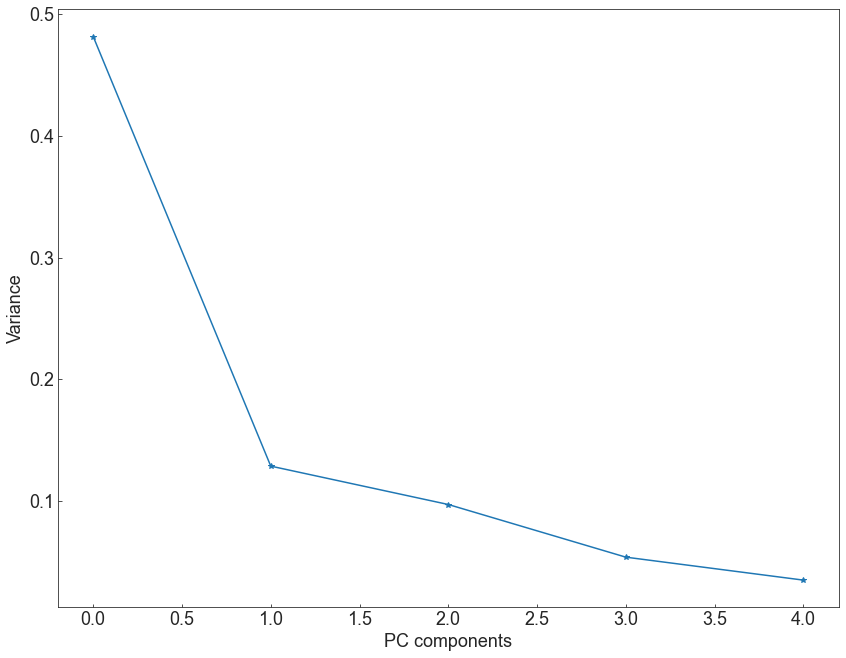

In [25]:
os.chdir(cwd)
directory='./PcaBasisFromAll'
if not os.path.exists(directory):
    os.mkdir(directory)
os.chdir(directory)
pca_obj3 = coor.pca(inp3, var_cutoff=0.95)
Ypca3 = pca_obj3.get_output()[0]
variance3 = pca_obj3.eigenvalues/sum(pca_obj3.eigenvalues)
print(variance3[0:5])
plot(variance3[0:5],'-*')
xlabel('PC components')
ylabel('Variance')

(<Figure size 1008x792 with 2 Axes>, <AxesSubplot:>)

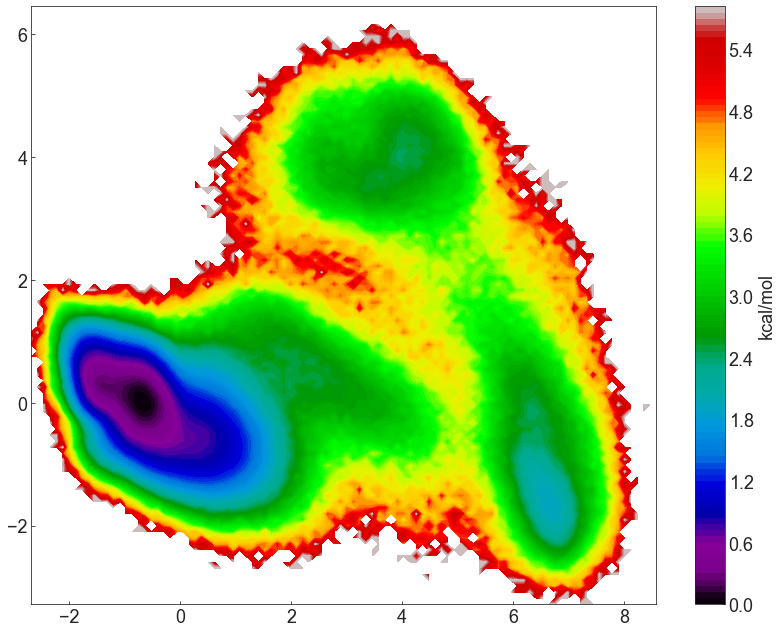

In [26]:
mplt.plot_free_energy(Ypca3[:,0], Ypca3[:,1], kT=0.593, cbar_label='kcal/mol')

In [27]:
path='./60sLoop/'
if not os.path.exists(path):
    os.mkdir(path)
pca_obj3.write_to_csv(os.path.join(path,'projection.txt'), '.txt')
np.savetxt(os.path.join(path,'variance.txt'),variance3,delimiter="\n")
np.save(os.path.join(path,'variance.npy'),variance3)
tmp3=np.loadtxt(os.path.join(path,'projection.txt'))
np.save(os.path.join(path,'projection.npy'),tmp3)

saving to csv:   0%|                                           | 0/17 [00:00<?, ?it/s]

In [28]:
# Helix1 (residue 158 to 166)
feat4 = coor.featurizer(topfile)
helix1 = feat4.select("(residue 158 to 166) and element != 'H'")
print('selection index:\n',helix1)
print('\nnumber of atoms:\n',len(helix1))
feat4.add_selection(helix1)
feat4.describe()[:10]

selection index:
 [2576 2578 2580 2583 2584 2585 2586 2587 2588 2590 2592 2595 2598 2601
 2603 2604 2607 2610 2611 2612 2614 2616 2619 2622 2623 2624 2625 2626
 2627 2629 2631 2633 2635 2639 2640 2641 2643 2645 2649 2650 2651 2653
 2655 2659 2660 2661 2663 2665 2668 2670 2671 2672 2674 2676 2679 2681
 2685 2689 2690 2691 2693 2695 2698 2700 2704 2708 2709]

number of atoms:
 67


['ATOM:ASP 158 N 2576 1 x',
 'ATOM:ASP 158 N 2576 1 y',
 'ATOM:ASP 158 N 2576 1 z',
 'ATOM:ASP 158 CA 2578 1 x',
 'ATOM:ASP 158 CA 2578 1 y',
 'ATOM:ASP 158 CA 2578 1 z',
 'ATOM:ASP 158 CB 2580 1 x',
 'ATOM:ASP 158 CB 2580 1 y',
 'ATOM:ASP 158 CB 2580 1 z',
 'ATOM:ASP 158 CG 2583 1 x']

In [29]:
inp4 = coor.source(trajfile, feat4)
inp4.get_output()
print('trajectory length = ',inp4.trajectory_length(0))
print('number of dimension = ',inp4.dimension())

getting output of FeatureReader:   0%|                         | 0/10 [00:00<?, ?it/s]

trajectory length =  3200000
number of dimension =  201


calc mean+cov:   0%|                                           | 0/10 [00:00<?, ?it/s]

getting output of PCA:   0%|                                   | 0/10 [00:00<?, ?it/s]

[0.2953973  0.21083739 0.08920115 0.05349698 0.0505938 ]


Text(0, 0.5, 'Variance')

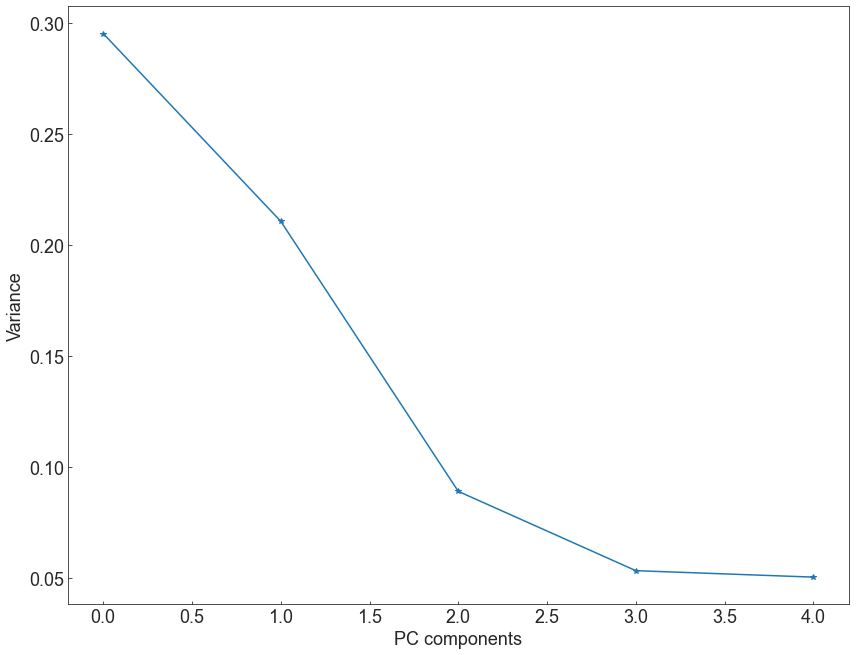

In [30]:
os.chdir(cwd)
directory='./PcaBasisFromAll'
if not os.path.exists(directory):
    os.mkdir(directory)
os.chdir(directory)
pca_obj4 = coor.pca(inp4, var_cutoff=0.95)
Ypca4 = pca_obj4.get_output()[0]
variance4 = pca_obj4.eigenvalues/sum(pca_obj4.eigenvalues)
print(variance4[0:5])
plot(variance4[0:5],'-*')
xlabel('PC components')
ylabel('Variance')

(<Figure size 1008x792 with 2 Axes>, <AxesSubplot:>)

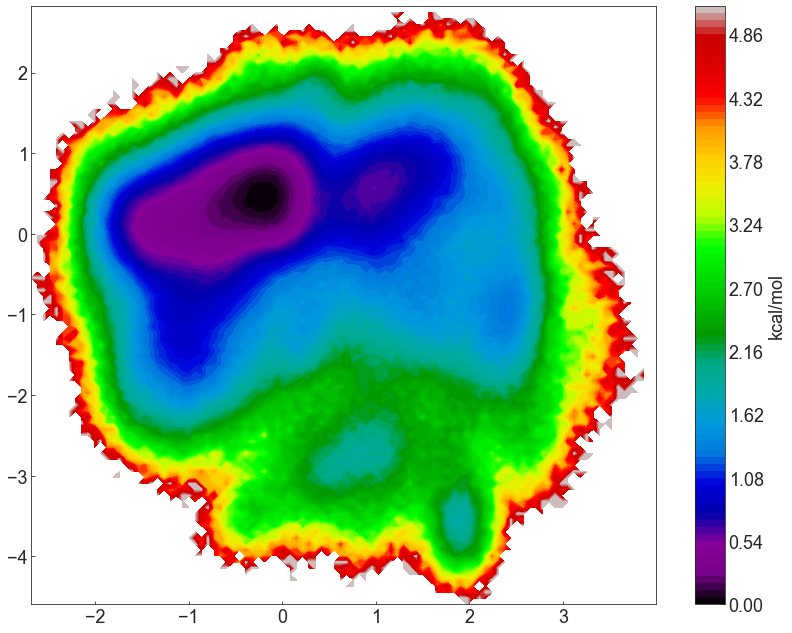

In [31]:
mplt.plot_free_energy(Ypca4[:,0], Ypca4[:,1], kT=0.593, cbar_label='kcal/mol')

In [32]:
path='./helix1/'
if not os.path.exists(path):
    os.mkdir(path)
pca_obj4.write_to_csv(os.path.join(path,'projection.txt'), '.txt')
np.savetxt(os.path.join(path,'variance.txt'),variance4,delimiter="\n")
np.save(os.path.join(path,'variance.npy'),variance4)
tmp4=np.loadtxt(os.path.join(path,'projection.txt'))
np.save(os.path.join(path,'projection.npy'),tmp4)

saving to csv:   0%|                                           | 0/10 [00:00<?, ?it/s]

In [33]:
# Gamma Loop
feat5 = coor.featurizer(topfile)
gammaLoop = feat5.select("(residue 182 to 190) and element != 'H'")
print('selection index:\n',gammaLoop)
print('\nnumber of atoms:\n',len(gammaLoop))
feat5.add_selection(gammaLoop)
feat5.describe()[:10]

selection index:
 [2941 2943 2945 2948 2951 2952 2953 2954 2955 2956 2958 2960 2962 2964
 2968 2969 2970 2972 2974 2977 2978 2980 2982 2983 2984 2986 2988 2990
 2992 2993 2994 2996 2998 3000 3002 3006 3007 3008 3010 3012 3016 3017
 3018 3020 3022 3025 3026 3027 3030 3031 3032 3034 3036 3038 3042 3046
 3047 3048 3050 3053 3054 3055 3057 3059 3062 3065 3068 3071 3075 3076]

number of atoms:
 70


['ATOM:GLU 182 N 2941 1 x',
 'ATOM:GLU 182 N 2941 1 y',
 'ATOM:GLU 182 N 2941 1 z',
 'ATOM:GLU 182 CA 2943 1 x',
 'ATOM:GLU 182 CA 2943 1 y',
 'ATOM:GLU 182 CA 2943 1 z',
 'ATOM:GLU 182 CB 2945 1 x',
 'ATOM:GLU 182 CB 2945 1 y',
 'ATOM:GLU 182 CB 2945 1 z',
 'ATOM:GLU 182 CG 2948 1 x']

In [34]:
inp5 = coor.source(trajfile, feat5)
inp5.get_output()
print('trajectory length = ',inp5.trajectory_length(0))
print('number of dimension = ',inp5.dimension())

getting output of FeatureReader:   0%|                         | 0/11 [00:00<?, ?it/s]

trajectory length =  3200000
number of dimension =  210


calc mean+cov:   0%|                                           | 0/11 [00:00<?, ?it/s]

getting output of PCA:   0%|                                   | 0/11 [00:00<?, ?it/s]

[0.32955023 0.21845182 0.10148387 0.08409533 0.04175192]


Text(0, 0.5, 'Variance')

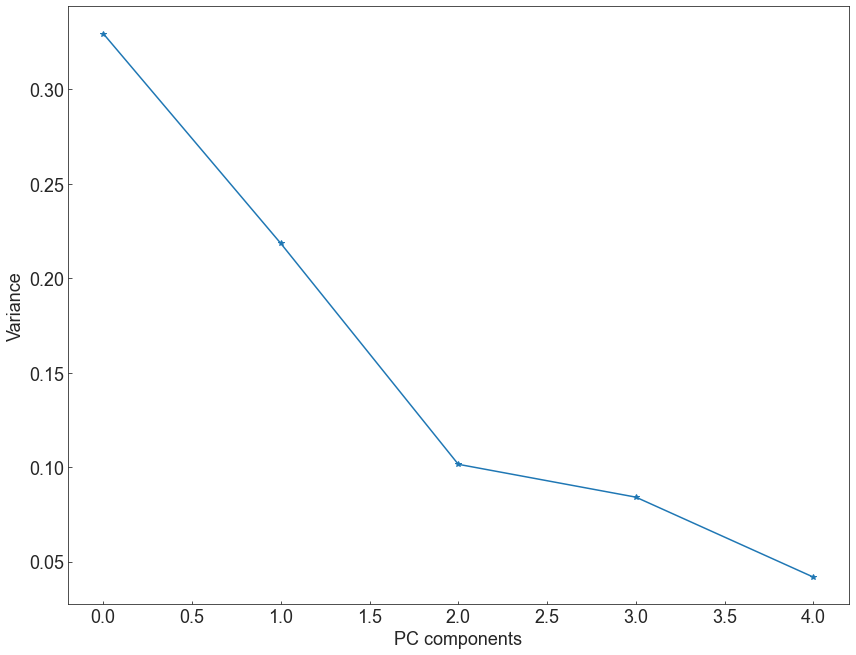

In [35]:
os.chdir(cwd)
directory='./PcaBasisFromAll'
if not os.path.exists(directory):
    os.mkdir(directory)
os.chdir(directory)
pca_obj5 = coor.pca(inp5, var_cutoff=0.95)
Ypca5 = pca_obj5.get_output()[0]
variance5 = pca_obj5.eigenvalues/sum(pca_obj5.eigenvalues)
print(variance5[0:5])
plot(variance5[0:5],'-*')
xlabel('PC components')
ylabel('Variance')

(<Figure size 1008x792 with 2 Axes>, <AxesSubplot:>)

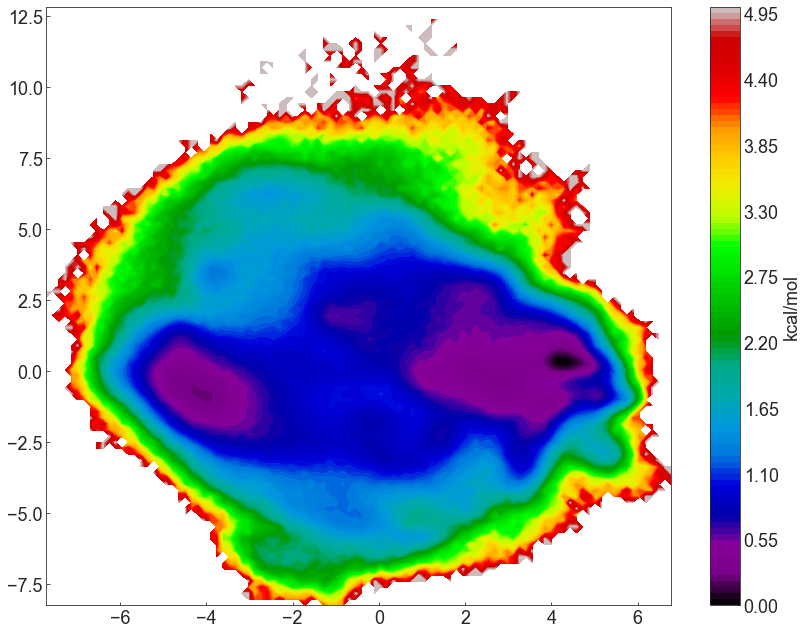

In [36]:
mplt.plot_free_energy(Ypca5[:,0], Ypca5[:,1], kT=0.593, cbar_label='kcal/mol')

In [37]:
path='./gammaLoop/'
if not os.path.exists(path):
    os.mkdir(path)
pca_obj5.write_to_csv(os.path.join(path,'projection.txt'), '.txt')
np.savetxt(os.path.join(path,'variance.txt'),variance5,delimiter="\n")
np.save(os.path.join(path,'variance.npy'),variance5)
tmp5=np.loadtxt(os.path.join(path,'projection.txt'))
np.save(os.path.join(path,'projection.npy'),tmp5)

saving to csv:   0%|                                           | 0/11 [00:00<?, ?it/s]

In [38]:
# 170s Loop (residue 204 to 219)
feat6 = coor.featurizer(topfile)
I70sLoop = feat6.select("(residue 204 to 219) and element != 'H'")
print('selection index:\n',I70sLoop)
print('\nnumber of atoms:\n',len(I70sLoop))
feat6.add_selection(I70sLoop)
feat6.describe()[:10]

selection index:
 [3276 3278 3280 3282 3286 3290 3291 3292 3294 3296 3299 3302 3303 3304
 3305 3306 3307 3309 3311 3314 3317 3320 3322 3323 3326 3329 3330 3331
 3332 3335 3337 3340 3343 3344 3345 3347 3349 3351 3355 3359 3360 3361
 3363 3365 3368 3369 3370 3371 3373 3375 3378 3381 3384 3387 3391 3392
 3393 3395 3397 3400 3401 3402 3403 3404 3405 3407 3409 3412 3414 3415
 3416 3418 3420 3422 3424 3428 3429 3430 3432 3434 3437 3440 3443 3445
 3446 3449 3452 3453 3454 3456 3458 3460 3464 3467 3471 3472 3473 3475
 3477 3480 3483 3486 3488 3489 3492 3495 3496 3497 3499 3501 3503 3507
 3510 3514 3515 3516 3518 3520 3522 3524 3528 3529 3530 3532 3534 3537
 3538 3539 3540 3541]

number of atoms:
 130


['ATOM:VAL 204 N 3276 1 x',
 'ATOM:VAL 204 N 3276 1 y',
 'ATOM:VAL 204 N 3276 1 z',
 'ATOM:VAL 204 CA 3278 1 x',
 'ATOM:VAL 204 CA 3278 1 y',
 'ATOM:VAL 204 CA 3278 1 z',
 'ATOM:VAL 204 CB 3280 1 x',
 'ATOM:VAL 204 CB 3280 1 y',
 'ATOM:VAL 204 CB 3280 1 z',
 'ATOM:VAL 204 CG1 3282 1 x']

In [39]:
inp6 = coor.source(trajfile, feat6)
inp6.get_output()
print('trajectory length = ',inp6.trajectory_length(0))
print('number of dimension = ',inp6.dimension())

getting output of FeatureReader:   0%|                         | 0/19 [00:00<?, ?it/s]

trajectory length =  3200000
number of dimension =  390


calc mean+cov:   0%|                                           | 0/19 [00:00<?, ?it/s]

getting output of PCA:   0%|                                   | 0/19 [00:00<?, ?it/s]

[0.19634492 0.13883958 0.08366048 0.07868163 0.06330133]


Text(0, 0.5, 'Variance')

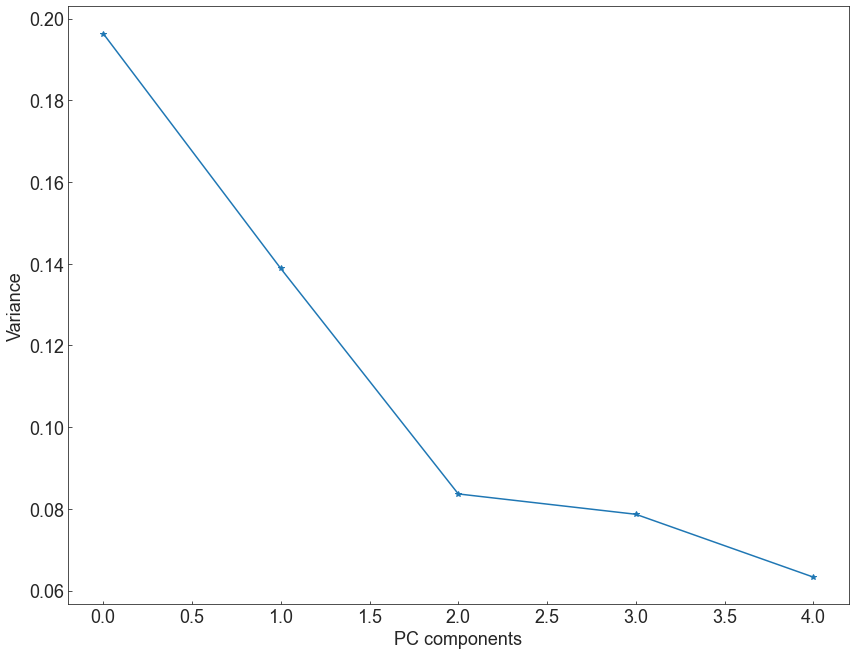

In [40]:
os.chdir(cwd)
directory='./PcaBasisFromAll'
if not os.path.exists(directory):
    os.mkdir(directory)
os.chdir(directory)
pca_obj6 = coor.pca(inp6, var_cutoff=0.95)
Ypca6 = pca_obj6.get_output()[0]
variance6 = pca_obj6.eigenvalues/sum(pca_obj6.eigenvalues)
print(variance6[0:5])
plot(variance6[0:5],'-*')
xlabel('PC components')
ylabel('Variance')

(<Figure size 1008x792 with 2 Axes>, <AxesSubplot:>)

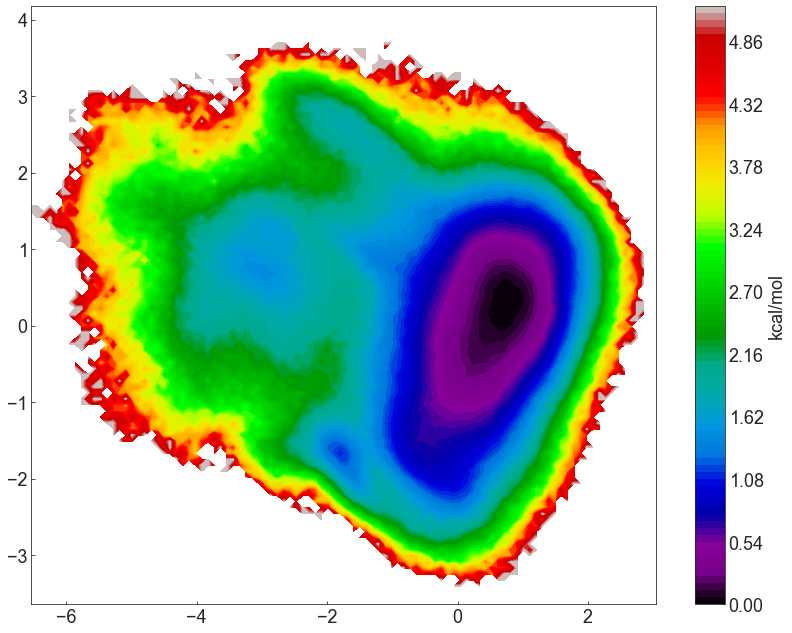

In [41]:
mplt.plot_free_energy(Ypca6[:,0], Ypca6[:,1], kT=0.593, cbar_label='kcal/mol')

In [42]:
path='./170sLoop/'
if not os.path.exists(path):
    os.mkdir(path)
pca_obj6.write_to_csv(os.path.join(path,'projection.txt'), '.txt')
np.savetxt(os.path.join(path,'variance.txt'),variance6,delimiter="\n")
np.save(os.path.join(path,'variance.npy'),variance6)
tmp6=np.loadtxt(os.path.join(path,'projection.txt'))
np.save(os.path.join(path,'projection.npy'),tmp6)

saving to csv:   0%|                                           | 0/19 [00:00<?, ?it/s]

In [43]:
# 180s Loop (residue 225 to 239)
feat65 = coor.featurizer(topfile)
I80sLoop = feat65.select("(residue 225 to 239) and element != 'H'")
print('selection index:\n',I80sLoop)
print('\nnumber of atoms:\n',len(I80sLoop))
feat65.add_selection(I80sLoop)
feat65.describe()[:10]

selection index:
 [3613 3615 3618 3619 3620 3622 3624 3627 3628 3630 3632 3633 3635 3637
 3639 3640 3641 3643 3645 3648 3651 3654 3657 3661 3662 3663 3664 3667
 3669 3672 3675 3676 3677 3679 3681 3684 3685 3686 3687 3688 3689 3691
 3693 3696 3699 3700 3701 3702 3703 3704 3706 3709 3710 3711 3713 3715
 3718 3721 3724 3727 3731 3732 3733 3735 3737 3740 3743 3746 3748 3749
 3752 3755 3756 3757 3759 3762 3763 3764 3766 3768 3771 3772 3773 3774
 3775 3776 3778 3780 3784 3785 3786 3788 3790 3793 3794 3795 3796 3798
 3800 3803 3806 3807 3808 3809 3810 3811 3813 3816 3817]

number of atoms:
 109


['ATOM:GLY 225 N 3613 1 x',
 'ATOM:GLY 225 N 3613 1 y',
 'ATOM:GLY 225 N 3613 1 z',
 'ATOM:GLY 225 CA 3615 1 x',
 'ATOM:GLY 225 CA 3615 1 y',
 'ATOM:GLY 225 CA 3615 1 z',
 'ATOM:GLY 225 C 3618 1 x',
 'ATOM:GLY 225 C 3618 1 y',
 'ATOM:GLY 225 C 3618 1 z',
 'ATOM:GLY 225 O 3619 1 x']

In [44]:
inp65 = coor.source(trajfile, feat65)
inp65.get_output()
print('trajectory length = ',inp65.trajectory_length(0))
print('number of dimension = ',inp65.dimension())

getting output of FeatureReader:   0%|                         | 0/16 [00:00<?, ?it/s]

trajectory length =  3200000
number of dimension =  327


calc mean+cov:   0%|                                           | 0/16 [00:00<?, ?it/s]

getting output of PCA:   0%|                                   | 0/16 [00:00<?, ?it/s]

[0.29823015 0.1130262  0.09654533 0.07439621 0.05036454]


Text(0, 0.5, 'Variance')

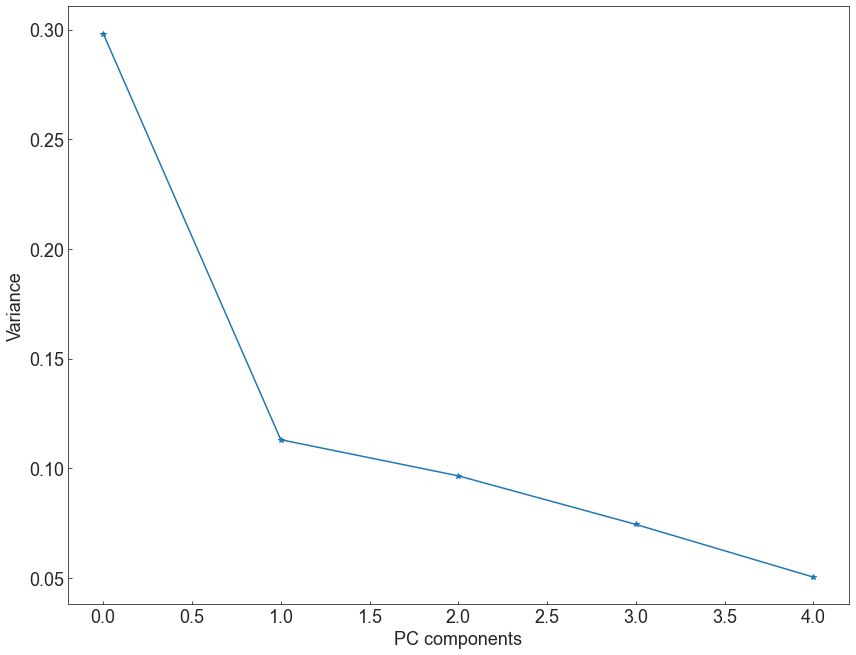

In [45]:
os.chdir(cwd)
directory='./PcaBasisFromAll'
if not os.path.exists(directory):
    os.mkdir(directory)
os.chdir(directory)
pca_obj65 = coor.pca(inp65, var_cutoff=0.95)
Ypca65 = pca_obj65.get_output()[0]
variance65 = pca_obj65.eigenvalues/sum(pca_obj65.eigenvalues)
print(variance65[0:5])
plot(variance65[0:5],'-*')
xlabel('PC components')
ylabel('Variance')

(<Figure size 1008x792 with 2 Axes>, <AxesSubplot:>)

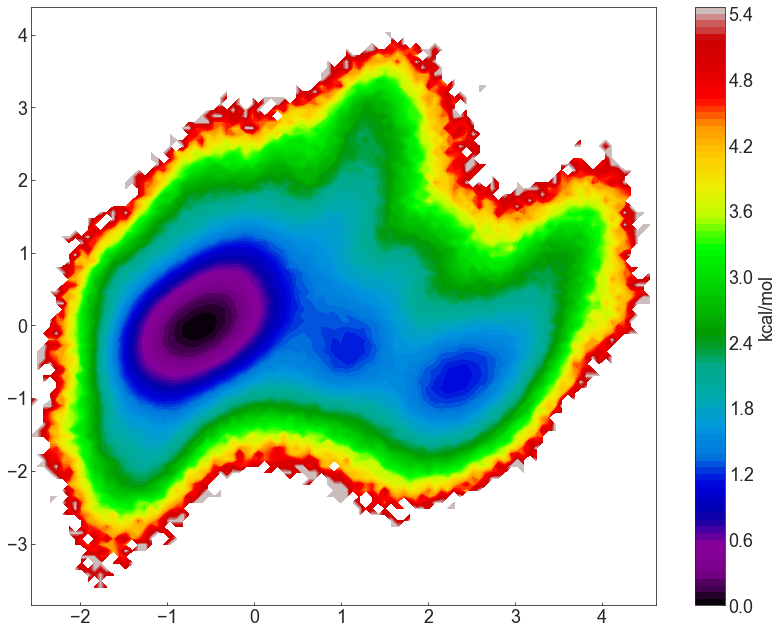

In [46]:
mplt.plot_free_energy(Ypca65[:,0], Ypca65[:,1], kT=0.593, cbar_label='kcal/mol')

In [47]:
path='./180sLoop/'
if not os.path.exists(path):
    os.mkdir(path)
pca_obj65.write_to_csv(os.path.join(path,'projection.txt'), '.txt')
np.savetxt(os.path.join(path,'variance.txt'),variance65,delimiter="\n")
np.save(os.path.join(path,'variance.npy'),variance65)
tmp65=np.loadtxt(os.path.join(path,'projection.txt'))
np.save(os.path.join(path,'projection.npy'),tmp65)

saving to csv:   0%|                                           | 0/16 [00:00<?, ?it/s]

In [48]:
# Sodium Loop
feat7 = coor.featurizer(topfile)
sodiumLoop = feat7.select("(residue 262 to 274) and element != 'H'")
print('selection index:\n',sodiumLoop)
print('\nnumber of atoms:\n',len(sodiumLoop))
feat7.add_selection(sodiumLoop)
feat7.describe()[:10]

selection index:
 [4162 4164 4166 4169 4171 4172 4173 4175 4178 4179 4180 4182 4185 4186
 4187 4189 4191 4194 4195 4196 4197 4199 4201 4204 4205 4206 4207 4208
 4209 4211 4213 4216 4219 4222 4224 4225 4228 4231 4232 4233 4235 4237
 4240 4241 4242 4243 4244 4245 4247 4250 4251 4252 4254 4256 4259 4262
 4265 4268 4272 4273 4274 4276 4278 4281 4282 4284 4286 4287 4289 4291
 4293 4294 4295 4297 4300 4301]

number of atoms:
 76


['ATOM:SER 262 N 4162 1 x',
 'ATOM:SER 262 N 4162 1 y',
 'ATOM:SER 262 N 4162 1 z',
 'ATOM:SER 262 CA 4164 1 x',
 'ATOM:SER 262 CA 4164 1 y',
 'ATOM:SER 262 CA 4164 1 z',
 'ATOM:SER 262 CB 4166 1 x',
 'ATOM:SER 262 CB 4166 1 y',
 'ATOM:SER 262 CB 4166 1 z',
 'ATOM:SER 262 OG 4169 1 x']

In [49]:
inp7 = coor.source(trajfile, feat7)
inp7.get_output()
print('trajectory length = ',inp7.trajectory_length(0))
print('number of dimension = ',inp7.dimension())

getting output of FeatureReader:   0%|                         | 0/11 [00:00<?, ?it/s]

trajectory length =  3200000
number of dimension =  228


calc mean+cov:   0%|                                           | 0/11 [00:00<?, ?it/s]

getting output of PCA:   0%|                                   | 0/11 [00:00<?, ?it/s]

[0.33854357 0.104999   0.07835674 0.06169988 0.05542745]


Text(0, 0.5, 'Variance')

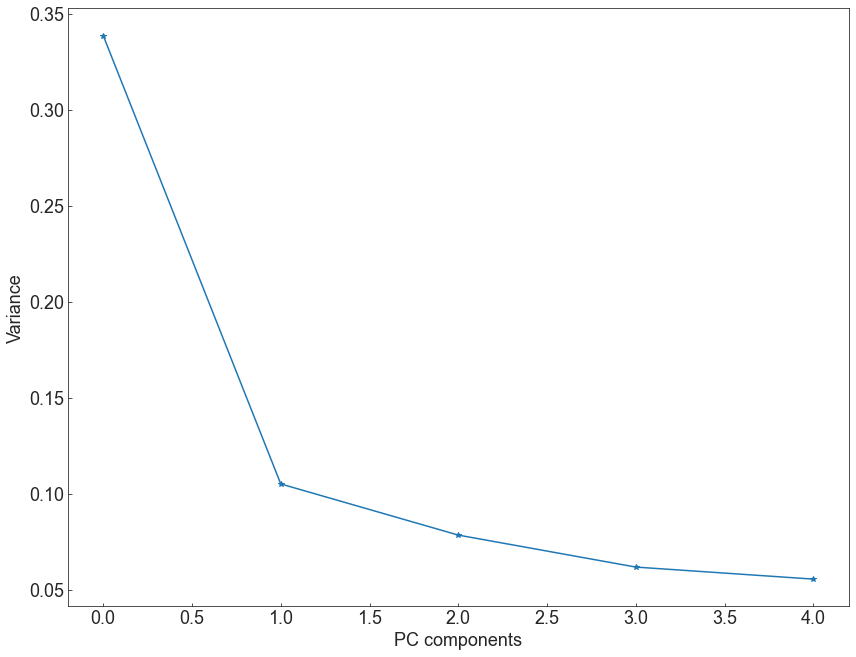

In [50]:
os.chdir(cwd)
directory='./PcaBasisFromAll'
if not os.path.exists(directory):
    os.mkdir(directory)
os.chdir(directory)
pca_obj7 = coor.pca(inp7, var_cutoff=0.95)
Ypca7 = pca_obj7.get_output()[0]
variance7 = pca_obj7.eigenvalues/sum(pca_obj7.eigenvalues)
print(variance7[0:5])
plot(variance7[0:5],'-*')
xlabel('PC components')
ylabel('Variance')

(<Figure size 1008x792 with 2 Axes>, <AxesSubplot:>)

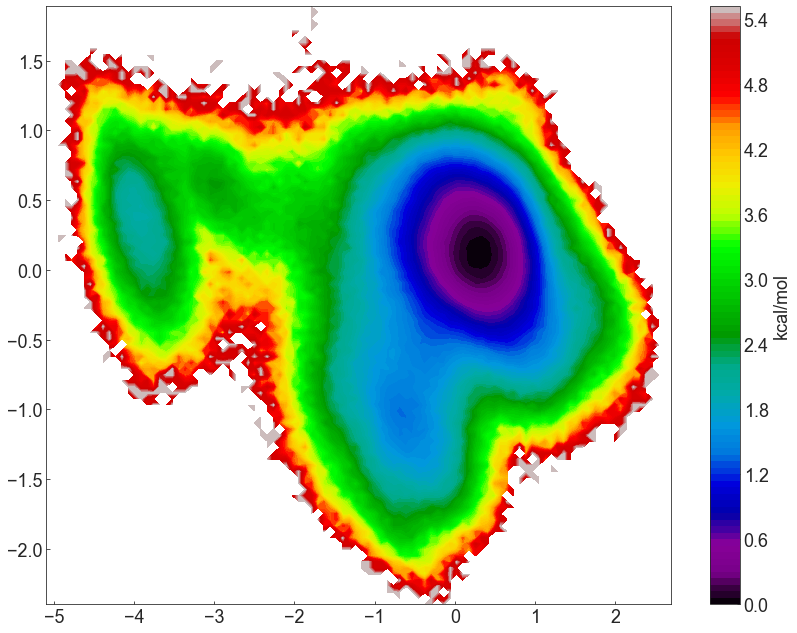

In [51]:
mplt.plot_free_energy(Ypca7[:,0], Ypca7[:,1], kT=0.593, cbar_label='kcal/mol')

In [52]:
path='./sodiumLoop/'
if not os.path.exists(path):
    os.mkdir(path)
pca_obj7.write_to_csv(os.path.join(path,'projection.txt'), '.txt')
np.savetxt(os.path.join(path,'variance.txt'),variance7,delimiter="\n")
np.save(os.path.join(path,'variance.npy'),variance7)
tmp7=np.loadtxt(os.path.join(path,'projection.txt'))
np.save(os.path.join(path,'projection.npy'),tmp7)

saving to csv:   0%|                                           | 0/11 [00:00<?, ?it/s]

In [53]:
# Catalytic Triad
feat8 = coor.featurizer(topfile)
catalyticTriad = feat8.select("(residue 79 or residue 135 or residue 241) and element != 'H'")
print('selection index:\n',catalyticTriad)
print('\nnumber of atoms:\n',len(catalyticTriad))
feat8.add_selection(catalyticTriad)
feat8.describe()[:10]

selection index:
 [1210 1212 1214 1217 1219 1220 1222 1223 1225 1226 2201 2203 2205 2208
 2209 2210 2211 2212 3830 3832 3834 3837 3839 3840]

number of atoms:
 24


['ATOM:HIS 79 N 1210 1 x',
 'ATOM:HIS 79 N 1210 1 y',
 'ATOM:HIS 79 N 1210 1 z',
 'ATOM:HIS 79 CA 1212 1 x',
 'ATOM:HIS 79 CA 1212 1 y',
 'ATOM:HIS 79 CA 1212 1 z',
 'ATOM:HIS 79 CB 1214 1 x',
 'ATOM:HIS 79 CB 1214 1 y',
 'ATOM:HIS 79 CB 1214 1 z',
 'ATOM:HIS 79 ND1 1217 1 x']

In [54]:
inp8 = coor.source(trajfile, feat8)
inp8.get_output()
print('trajectory length = ',inp8.trajectory_length(0))
print('number of dimension = ',inp8.dimension())

getting output of FeatureReader:   0%|                          | 0/4 [00:00<?, ?it/s]

trajectory length =  3200000
number of dimension =  72


calc mean+cov:   0%|                                            | 0/4 [00:00<?, ?it/s]

getting output of PCA:   0%|                                    | 0/4 [00:00<?, ?it/s]

[0.22383588 0.17083993 0.12692634 0.09179617 0.06602871]


Text(0, 0.5, 'Variance')

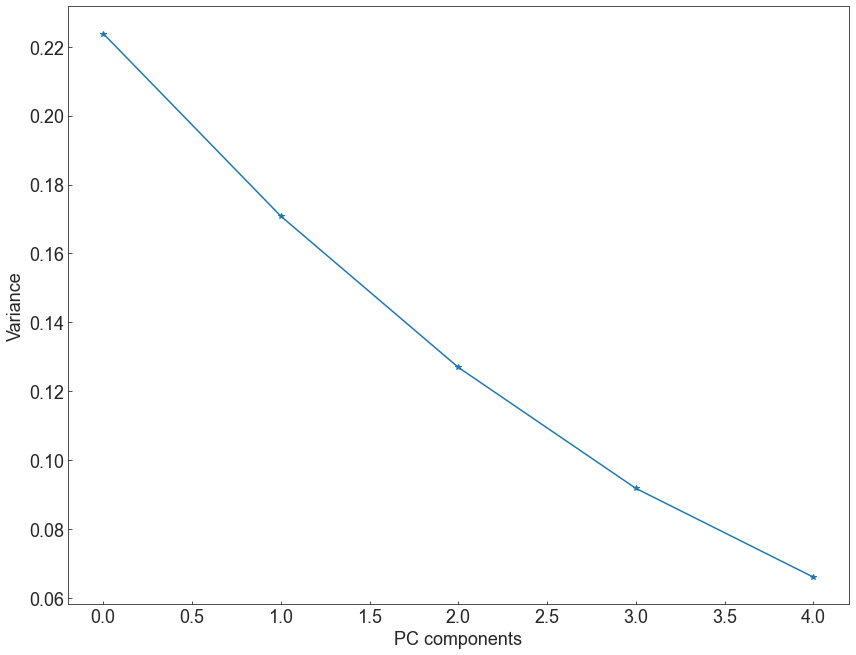

In [55]:
os.chdir(cwd)
directory='./PcaBasisFromAll'
if not os.path.exists(directory):
    os.mkdir(directory)
os.chdir(directory)
pca_obj8 = coor.pca(inp8, var_cutoff=0.95)
Ypca8 = pca_obj8.get_output()[0]
variance8 = pca_obj8.eigenvalues/sum(pca_obj8.eigenvalues)
print(variance8[0:5])
plot(variance8[0:5],'-*')
xlabel('PC components')
ylabel('Variance')

(<Figure size 1008x792 with 2 Axes>, <AxesSubplot:>)

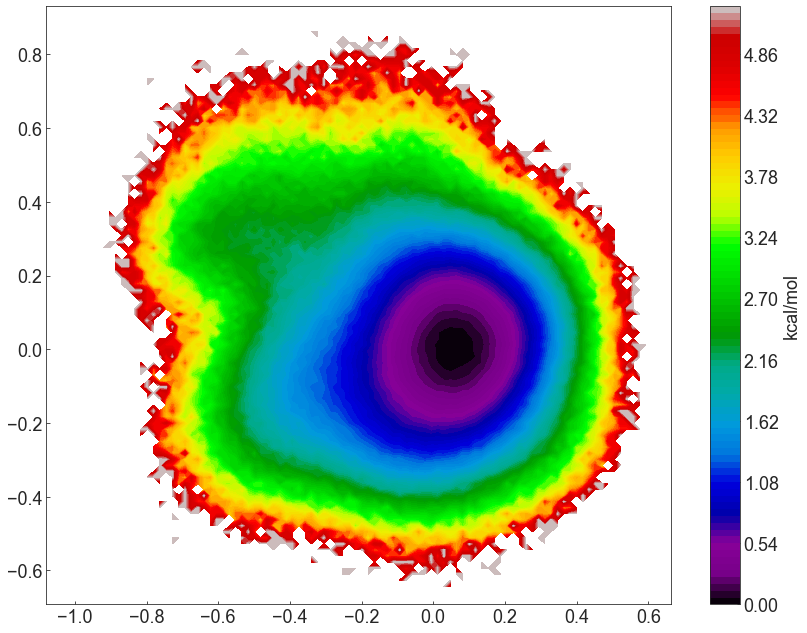

In [56]:
mplt.plot_free_energy(Ypca8[:,0], Ypca8[:,1], kT=0.593, cbar_label='kcal/mol')

In [57]:
path='./catalyticTriad/'
if not os.path.exists(path):
    os.mkdir(path)
pca_obj8.write_to_csv(os.path.join(path,'projection.txt'), '.txt')
np.savetxt(os.path.join(path,'variance.txt'),variance8,delimiter="\n")
np.save(os.path.join(path,'variance.npy'),variance8)
tmp8=np.loadtxt(os.path.join(path,'projection.txt'))
np.save(os.path.join(path,'projection.npy'),tmp8)

saving to csv:   0%|                                            | 0/4 [00:00<?, ?it/s]

In [58]:
# Exosite I
feat9 = coor.featurizer(topfile)
exociteI = feat9.select("(residue 57 or residue 98 or residue 104 or residue 106 or residue 109 or residue 142 to 143) and element != 'H'")
print('selection index:\n',exociteI)
print('\nnumber of atoms:\n',len(exociteI))
feat9.add_selection(exociteI)
feat9.describe()[:10]

selection index:
 [ 877  879  881  884  887  890  893  897  898 1525 1527 1529 1532 1535
 1538 1540 1541 1544 1547 1548 1625 1627 1629 1632 1635 1638 1640 1641
 1644 1647 1648 1663 1665 1667 1670 1673 1676 1678 1679 1682 1685 1686
 1723 1725 1727 1730 1733 1736 1738 1739 1742 1745 1746 2319 2321 2323
 2326 2329 2332 2335 2339 2340 2341 2343 2345 2348 2351 2354 2357 2361
 2362]

number of atoms:
 71


['ATOM:LYS 57 N 877 1 x',
 'ATOM:LYS 57 N 877 1 y',
 'ATOM:LYS 57 N 877 1 z',
 'ATOM:LYS 57 CA 879 1 x',
 'ATOM:LYS 57 CA 879 1 y',
 'ATOM:LYS 57 CA 879 1 z',
 'ATOM:LYS 57 CB 881 1 x',
 'ATOM:LYS 57 CB 881 1 y',
 'ATOM:LYS 57 CB 881 1 z',
 'ATOM:LYS 57 CG 884 1 x']

In [59]:
inp9 = coor.source(trajfile, feat9)
inp9.get_output()
print('trajectory length = ',inp9.trajectory_length(0))
print('number of dimension = ',inp9.dimension())

getting output of FeatureReader:   0%|                         | 0/11 [00:00<?, ?it/s]

trajectory length =  3200000
number of dimension =  213


calc mean+cov:   0%|                                           | 0/11 [00:00<?, ?it/s]

getting output of PCA:   0%|                                   | 0/11 [00:00<?, ?it/s]

[0.22015606 0.1143696  0.08871054 0.06819583 0.06142532]


Text(0, 0.5, 'Variance')

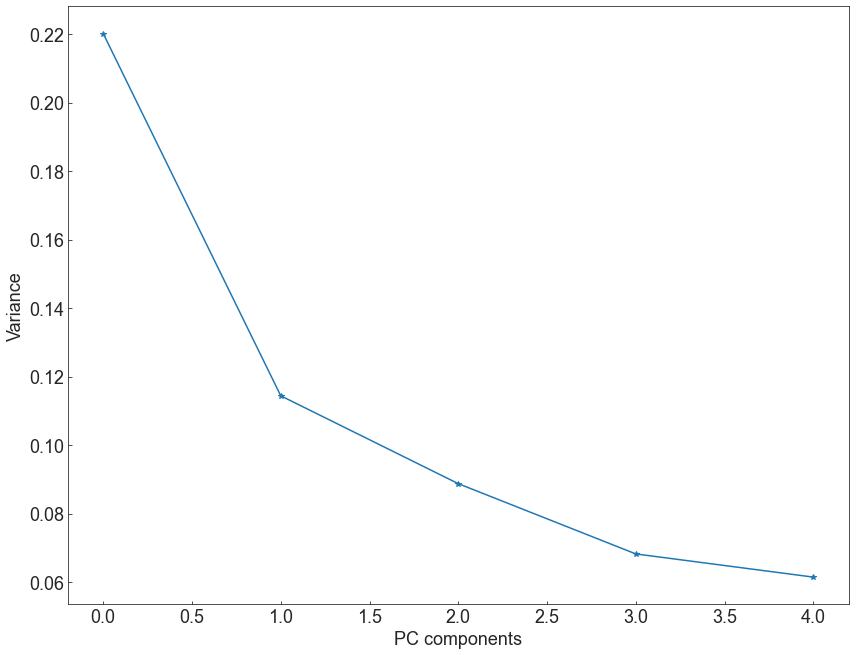

In [60]:
os.chdir(cwd)
directory='./PcaBasisFromAll'
if not os.path.exists(directory):
    os.mkdir(directory)
os.chdir(directory)
pca_obj9 = coor.pca(inp9, var_cutoff=0.95)
Ypca9 = pca_obj9.get_output()[0]
variance9 = pca_obj9.eigenvalues/sum(pca_obj9.eigenvalues)
print(variance9[0:5])
plot(variance9[0:5],'-*')
xlabel('PC components')
ylabel('Variance')

(<Figure size 1008x792 with 2 Axes>, <AxesSubplot:>)

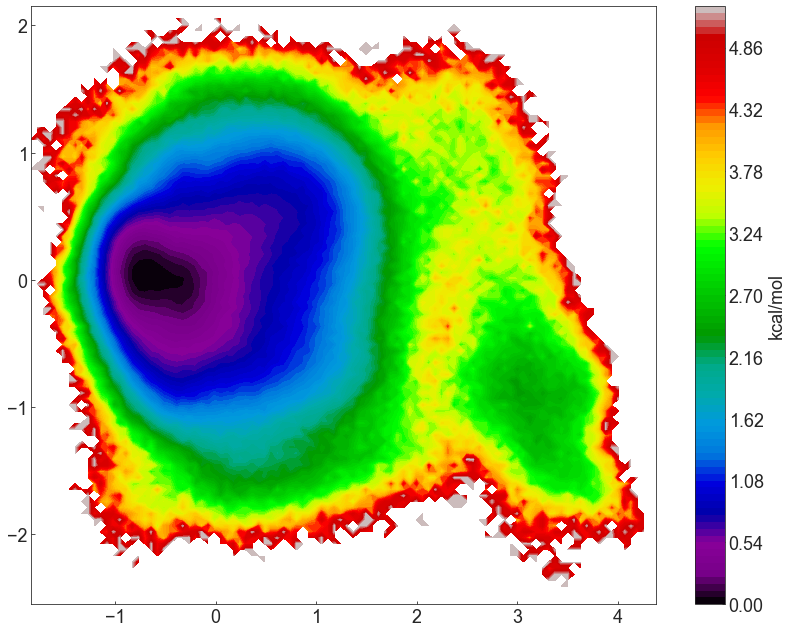

In [61]:
mplt.plot_free_energy(Ypca9[:,0], Ypca9[:,1], kT=0.593, cbar_label='kcal/mol')

In [62]:
path='./exositeI/'
if not os.path.exists(path):
    os.mkdir(path)
pca_obj9.write_to_csv(os.path.join(path,'projection.txt'), '.txt')
np.savetxt(os.path.join(path,'variance.txt'),variance9,delimiter="\n")
np.save(os.path.join(path,'variance.npy'),variance9)
tmp9=np.loadtxt(os.path.join(path,'projection.txt'))
np.save(os.path.join(path,'projection.npy'),tmp9)

saving to csv:   0%|                                           | 0/11 [00:00<?, ?it/s]

In [63]:
# Exosite II
feat10 = coor.featurizer(topfile)
exociteII = feat10.select("(residue 125 or residue 134 or residue 281 or residue 284 or residue 288) and element != 'H'")
print('selection index:\n',exociteII)
print('\nnumber of atoms:\n',len(exociteII))
feat10.add_selection(exociteII)
feat10.describe()[:10]

selection index:
 [2010 2012 2014 2017 2020 2023 2025 2026 2029 2032 2033 2177 2179 2181
 2184 2187 2190 2192 2193 2196 2199 2200 4410 4412 4414 4417 4420 4423
 4425 4426 4429 4432 4433 4475 4477 4479 4482 4485 4488 4491 4495 4496
 4557 4559 4561 4564 4567 4570 4573 4577 4578]

number of atoms:
 51


['ATOM:ARG 125 N 2010 1 x',
 'ATOM:ARG 125 N 2010 1 y',
 'ATOM:ARG 125 N 2010 1 z',
 'ATOM:ARG 125 CA 2012 1 x',
 'ATOM:ARG 125 CA 2012 1 y',
 'ATOM:ARG 125 CA 2012 1 z',
 'ATOM:ARG 125 CB 2014 1 x',
 'ATOM:ARG 125 CB 2014 1 y',
 'ATOM:ARG 125 CB 2014 1 z',
 'ATOM:ARG 125 CG 2017 1 x']

In [64]:
inp10 = coor.source(trajfile, feat10)
inp10.get_output()
print('trajectory length = ',inp10.trajectory_length(0))
print('number of dimension = ',inp10.dimension())

getting output of FeatureReader:   0%|                          | 0/8 [00:00<?, ?it/s]

trajectory length =  3200000
number of dimension =  153


calc mean+cov:   0%|                                            | 0/8 [00:00<?, ?it/s]

getting output of PCA:   0%|                                    | 0/8 [00:00<?, ?it/s]

[0.22706482 0.12998394 0.10280756 0.08832748 0.07143427]


Text(0, 0.5, 'Variance')

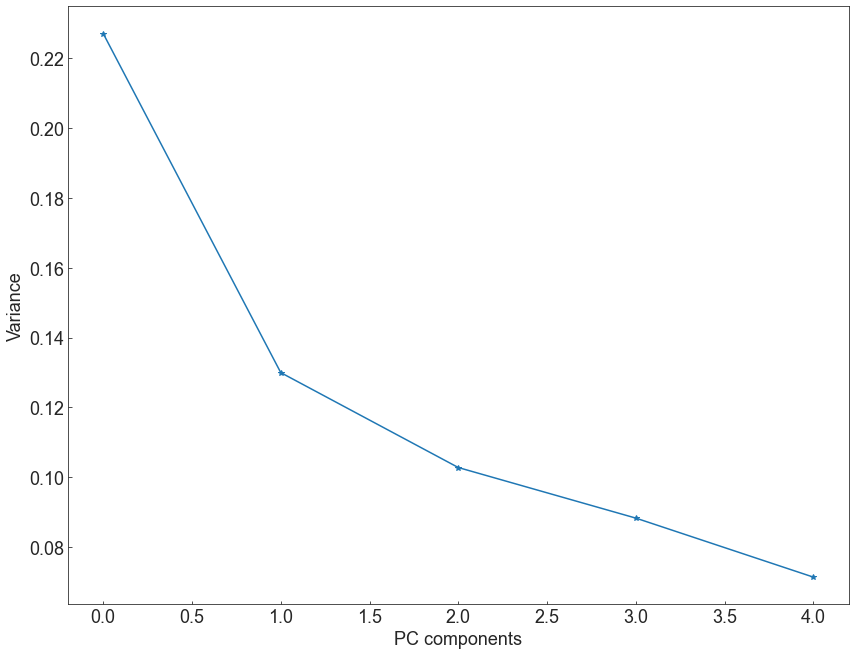

In [65]:
os.chdir(cwd)
directory='./PcaBasisFromAll'
if not os.path.exists(directory):
    os.mkdir(directory)
os.chdir(directory)
pca_obj10 = coor.pca(inp10, var_cutoff=0.95)
Ypca10 = pca_obj10.get_output()[0]
variance10 = pca_obj10.eigenvalues/sum(pca_obj10.eigenvalues)
print(variance10[0:5])
plot(variance10[0:5],'-*')
xlabel('PC components')
ylabel('Variance')

(<Figure size 1008x792 with 2 Axes>, <AxesSubplot:>)

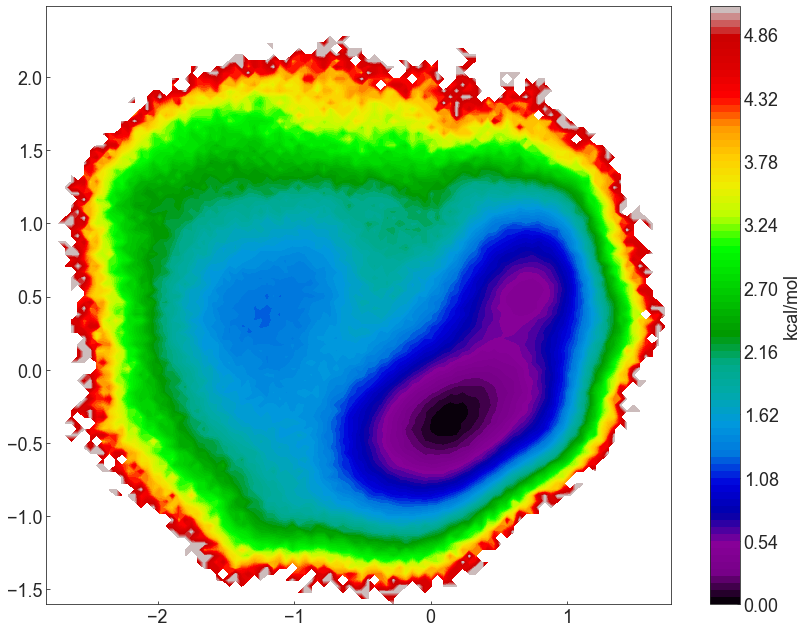

In [66]:
mplt.plot_free_energy(Ypca10[:,0], Ypca10[:,1], kT=0.593, cbar_label='kcal/mol')

In [67]:
path='./exositeII/'
if not os.path.exists(path):
    os.mkdir(path)
pca_obj10.write_to_csv(os.path.join(path,'projection.txt'), '.txt')
np.savetxt(os.path.join(path,'variance.txt'),variance10,delimiter="\n")
np.save(os.path.join(path,'variance.npy'),variance10)
tmp10=np.loadtxt(os.path.join(path,'projection.txt'))
np.save(os.path.join(path,'projection.npy'),tmp10)

saving to csv:   0%|                                            | 0/8 [00:00<?, ?it/s]

In [68]:
# BetaSheet1 (residue 171 to 176)
feat11 = coor.featurizer(topfile)
betaSheet1 = feat11.select("(residue 171 to 176) and element != 'H'")
print('selection index:\n',betaSheet1)
print('\nnumber of atoms:\n',len(betaSheet1))
feat11.add_selection(betaSheet1)
feat11.describe()[:10]

selection index:
 [2765 2767 2769 2772 2775 2778 2781 2785 2786 2787 2789 2792 2793 2794
 2796 2798 2801 2804 2807 2809 2810 2813 2816 2817 2818 2820 2822 2824
 2828 2832 2833 2834 2836 2838 2840 2842 2846 2847 2848 2850 2853 2854]

number of atoms:
 42


['ATOM:LYS 171 N 2765 1 x',
 'ATOM:LYS 171 N 2765 1 y',
 'ATOM:LYS 171 N 2765 1 z',
 'ATOM:LYS 171 CA 2767 1 x',
 'ATOM:LYS 171 CA 2767 1 y',
 'ATOM:LYS 171 CA 2767 1 z',
 'ATOM:LYS 171 CB 2769 1 x',
 'ATOM:LYS 171 CB 2769 1 y',
 'ATOM:LYS 171 CB 2769 1 z',
 'ATOM:LYS 171 CG 2772 1 x']

In [69]:
inp11 = coor.source(trajfile, feat11)
inp11.get_output()
print('trajectory length = ',inp11.trajectory_length(0))
print('number of dimension = ',inp11.dimension())

getting output of FeatureReader:   0%|                          | 0/7 [00:00<?, ?it/s]

trajectory length =  3200000
number of dimension =  126


calc mean+cov:   0%|                                            | 0/7 [00:00<?, ?it/s]

getting output of PCA:   0%|                                    | 0/7 [00:00<?, ?it/s]

[0.25603508 0.14083108 0.08983631 0.06775888 0.06391698]


Text(0, 0.5, 'Variance')

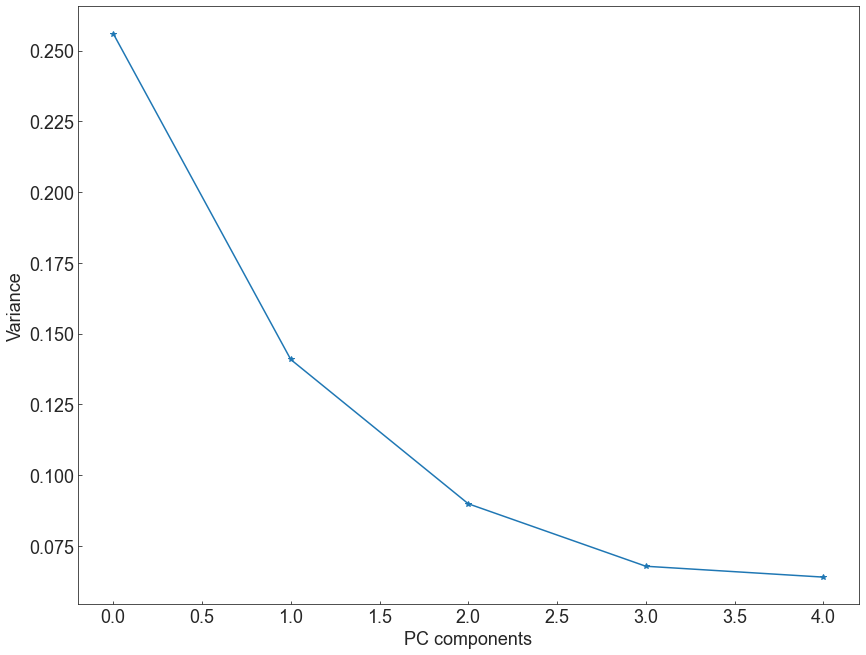

In [70]:
os.chdir(cwd)
directory='./PcaBasisFromAll'
if not os.path.exists(directory):
    os.mkdir(directory)
os.chdir(directory)
pca_obj11 = coor.pca(inp11, var_cutoff=0.95)
Ypca11 = pca_obj11.get_output()[0]
variance11 = pca_obj11.eigenvalues/sum(pca_obj11.eigenvalues)
print(variance11[0:5])
plot(variance11[0:5],'-*')
xlabel('PC components')
ylabel('Variance')

(<Figure size 1008x792 with 2 Axes>, <AxesSubplot:>)

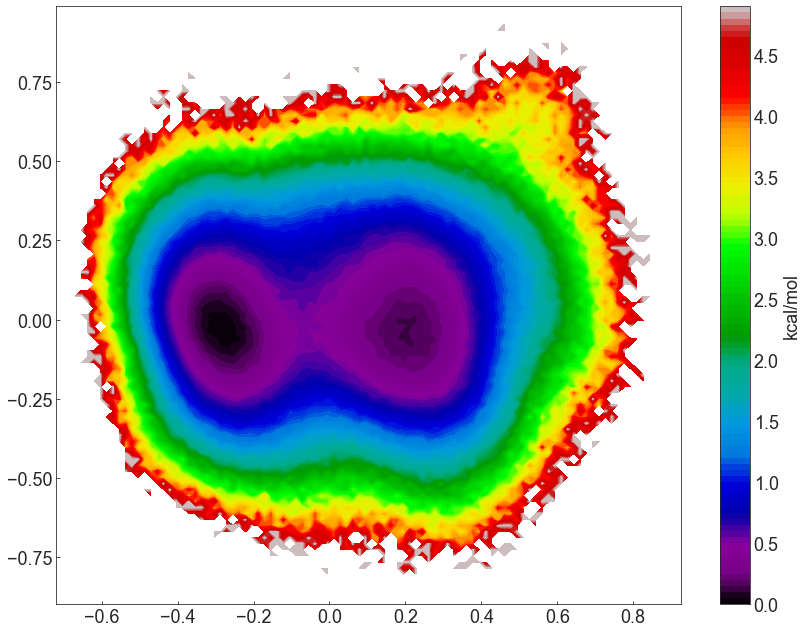

In [71]:
mplt.plot_free_energy(Ypca11[:,0], Ypca11[:,1], kT=0.593, cbar_label='kcal/mol')

In [72]:
path='./betaSheet1/'
if not os.path.exists(path):
    os.mkdir(path)
pca_obj11.write_to_csv(os.path.join(path,'projection.txt'), '.txt')
np.savetxt(os.path.join(path,'variance.txt'),variance11,delimiter="\n")
np.save(os.path.join(path,'variance.npy'),variance11)
tmp11=np.loadtxt(os.path.join(path,'projection.txt'))
np.save(os.path.join(path,'projection.npy'),tmp11)

saving to csv:   0%|                                            | 0/7 [00:00<?, ?it/s]

In [73]:
# ConnectionBetaSheet1 (residue 167 to 176)
feat12 = coor.featurizer(topfile)
connectionBetaSheet1 = feat12.select("(residue 167 to 176) and element != 'H'")
print('selection index:\n',connectionBetaSheet1)
print('\nnumber of atoms:\n',len(connectionBetaSheet1))
feat12.add_selection(connectionBetaSheet1)
feat12.describe()[:10]

selection index:
 [2710 2712 2714 2717 2720 2721 2722 2725 2726 2727 2729 2731 2735 2736
 2737 2739 2742 2743 2744 2746 2748 2751 2752 2754 2756 2757 2759 2761
 2763 2764 2765 2767 2769 2772 2775 2778 2781 2785 2786 2787 2789 2792
 2793 2794 2796 2798 2801 2804 2807 2809 2810 2813 2816 2817 2818 2820
 2822 2824 2828 2832 2833 2834 2836 2838 2840 2842 2846 2847 2848 2850
 2853 2854]

number of atoms:
 72


['ATOM:GLN 167 N 2710 1 x',
 'ATOM:GLN 167 N 2710 1 y',
 'ATOM:GLN 167 N 2710 1 z',
 'ATOM:GLN 167 CA 2712 1 x',
 'ATOM:GLN 167 CA 2712 1 y',
 'ATOM:GLN 167 CA 2712 1 z',
 'ATOM:GLN 167 CB 2714 1 x',
 'ATOM:GLN 167 CB 2714 1 y',
 'ATOM:GLN 167 CB 2714 1 z',
 'ATOM:GLN 167 CG 2717 1 x']

In [74]:
inp12 = coor.source(trajfile, feat12)
inp12.get_output()
print('trajectory length = ',inp12.trajectory_length(0))
print('number of dimension = ',inp12.dimension())

getting output of FeatureReader:   0%|                         | 0/11 [00:00<?, ?it/s]

trajectory length =  3200000
number of dimension =  216


calc mean+cov:   0%|                                           | 0/11 [00:00<?, ?it/s]

getting output of PCA:   0%|                                   | 0/11 [00:00<?, ?it/s]

[0.20647692 0.14648918 0.08240082 0.06831518 0.05814936]


Text(0, 0.5, 'Variance')

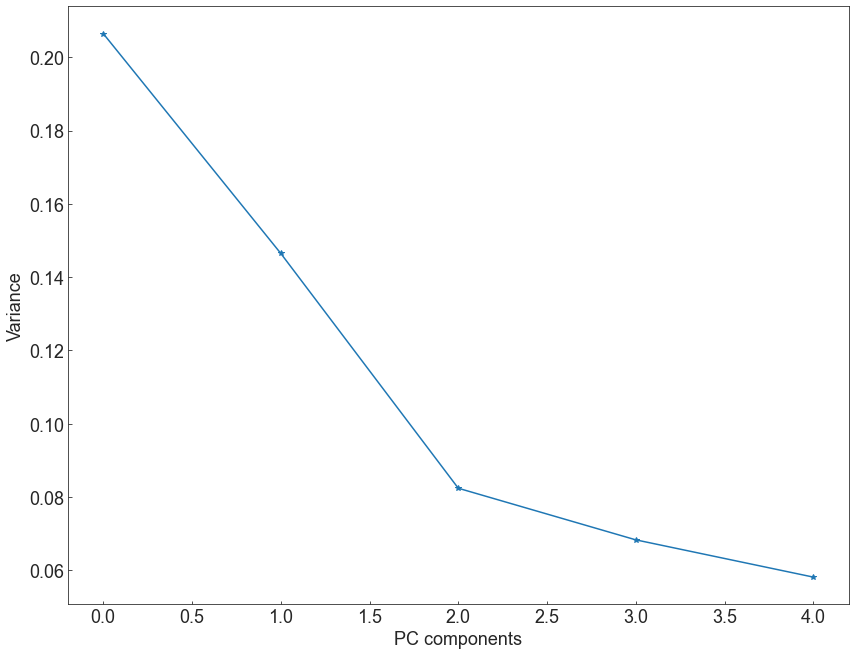

In [75]:
os.chdir(cwd)
directory='./PcaBasisFromAll'
if not os.path.exists(directory):
    os.mkdir(directory)
os.chdir(directory)
pca_obj12 = coor.pca(inp12, var_cutoff=0.95)
Ypca12 = pca_obj12.get_output()[0]
variance12 = pca_obj12.eigenvalues/sum(pca_obj12.eigenvalues)
print(variance12[0:5])
plot(variance12[0:5],'-*')
xlabel('PC components')
ylabel('Variance')

(<Figure size 1008x792 with 2 Axes>, <AxesSubplot:>)

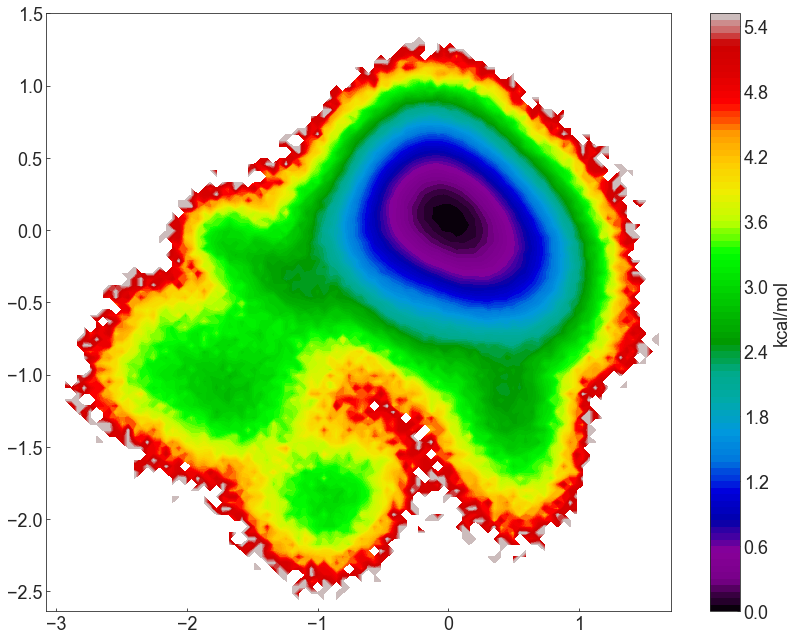

In [76]:
mplt.plot_free_energy(Ypca12[:,0], Ypca12[:,1], kT=0.593, cbar_label='kcal/mol')

In [77]:
path='./connectionBetaSheet1/'
if not os.path.exists(path):
    os.mkdir(path)
pca_obj12.write_to_csv(os.path.join(path,'projection.txt'), '.txt')
np.savetxt(os.path.join(path,'variance.txt'),variance12,delimiter="\n")
np.save(os.path.join(path,'variance.npy'),variance12)
tmp12=np.loadtxt(os.path.join(path,'projection.txt'))
np.save(os.path.join(path,'projection.npy'),tmp12)

saving to csv:   0%|                                           | 0/11 [00:00<?, ?it/s]

In [78]:
# Connection (residue 167 to 170)
feat13 = coor.featurizer(topfile)
connection = feat13.select("(residue 167 to 170) and element != 'H'")
print('selection index:\n',connection)
print('\nnumber of atoms:\n',len(connection))
feat13.add_selection(connection)
feat13.describe()[:10]

selection index:
 [2710 2712 2714 2717 2720 2721 2722 2725 2726 2727 2729 2731 2735 2736
 2737 2739 2742 2743 2744 2746 2748 2751 2752 2754 2756 2757 2759 2761
 2763 2764]

number of atoms:
 30


['ATOM:GLN 167 N 2710 1 x',
 'ATOM:GLN 167 N 2710 1 y',
 'ATOM:GLN 167 N 2710 1 z',
 'ATOM:GLN 167 CA 2712 1 x',
 'ATOM:GLN 167 CA 2712 1 y',
 'ATOM:GLN 167 CA 2712 1 z',
 'ATOM:GLN 167 CB 2714 1 x',
 'ATOM:GLN 167 CB 2714 1 y',
 'ATOM:GLN 167 CB 2714 1 z',
 'ATOM:GLN 167 CG 2717 1 x']

In [79]:
inp13 = coor.source(trajfile, feat13)
inp13.get_output()
print('trajectory length = ',inp13.trajectory_length(0))
print('number of dimension = ',inp13.dimension())

getting output of FeatureReader:   0%|                          | 0/5 [00:00<?, ?it/s]

trajectory length =  3200000
number of dimension =  90


calc mean+cov:   0%|                                            | 0/5 [00:00<?, ?it/s]

getting output of PCA:   0%|                                    | 0/5 [00:00<?, ?it/s]

[0.28418627 0.1926573  0.09258547 0.08206787 0.06746485]


Text(0, 0.5, 'Variance')

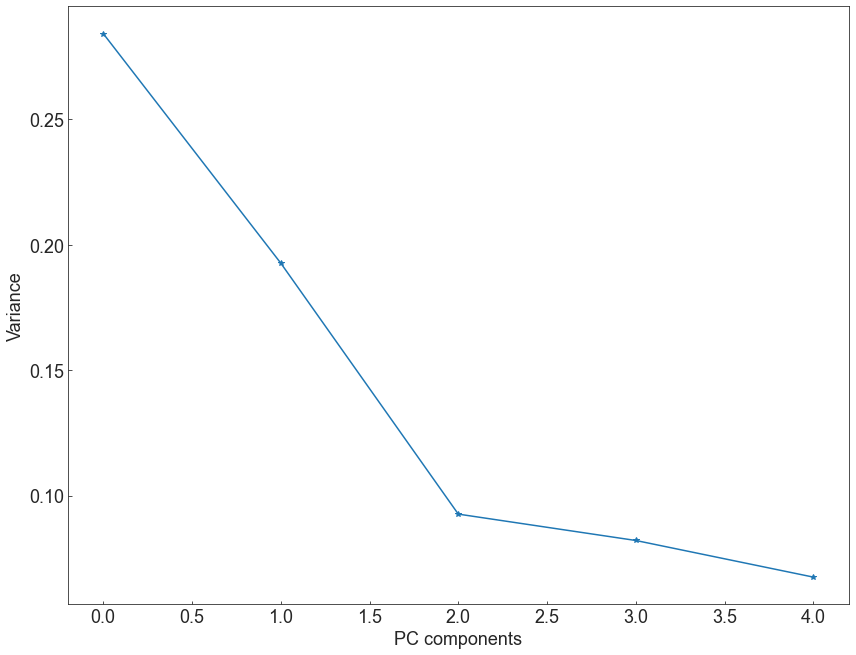

In [80]:
os.chdir(cwd)
directory='./PcaBasisFromAll'
if not os.path.exists(directory):
    os.mkdir(directory)
os.chdir(directory)
pca_obj13 = coor.pca(inp13, var_cutoff=0.95)
Ypca13 = pca_obj13.get_output()[0]
variance13 = pca_obj13.eigenvalues/sum(pca_obj13.eigenvalues)
print(variance13[0:5])
plot(variance13[0:5],'-*')
xlabel('PC components')
ylabel('Variance')

(<Figure size 1008x792 with 2 Axes>, <AxesSubplot:>)

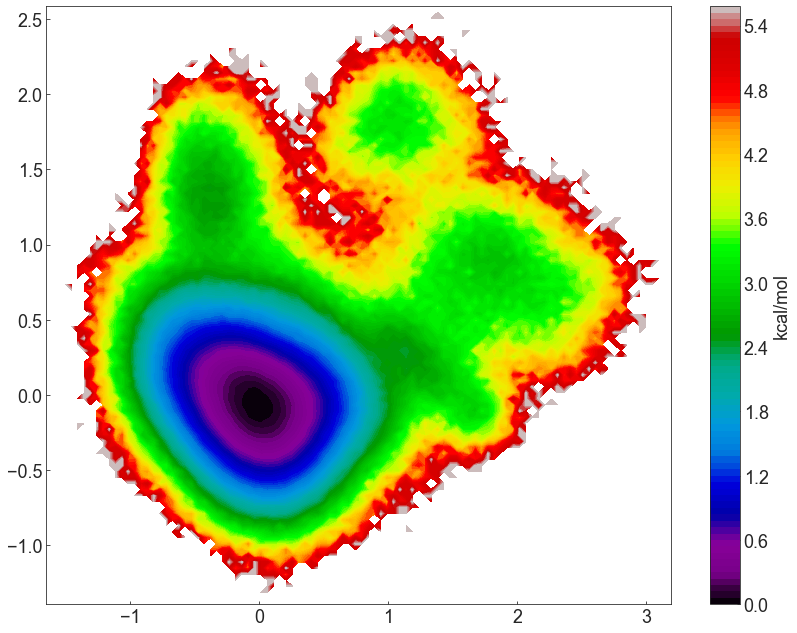

In [81]:
mplt.plot_free_energy(Ypca13[:,0], Ypca13[:,1], kT=0.593, cbar_label='kcal/mol')

In [82]:
path='./connection/'
if not os.path.exists(path):
    os.mkdir(path)
pca_obj13.write_to_csv(os.path.join(path,'projection.txt'), '.txt')
np.savetxt(os.path.join(path,'variance.txt'),variance13,delimiter="\n")
np.save(os.path.join(path,'variance.npy'),variance13)
tmp13=np.loadtxt(os.path.join(path,'projection.txt'))
np.save(os.path.join(path,'projection.npy'),tmp13)

saving to csv:   0%|                                            | 0/5 [00:00<?, ?it/s]

In [83]:
# Helix1ConnectionBetaSheet1 (residue 158 to 176)
feat14 = coor.featurizer(topfile)
helix1ConnectionBetaSheet1 = feat14.select("(residue 158 to 176) and element != 'H'")
print('selection index:\n',helix1ConnectionBetaSheet1)
print('\nnumber of atoms:\n',len(helix1ConnectionBetaSheet1))
feat14.add_selection(helix1ConnectionBetaSheet1)
feat14.describe()[:10]

selection index:
 [2576 2578 2580 2583 2584 2585 2586 2587 2588 2590 2592 2595 2598 2601
 2603 2604 2607 2610 2611 2612 2614 2616 2619 2622 2623 2624 2625 2626
 2627 2629 2631 2633 2635 2639 2640 2641 2643 2645 2649 2650 2651 2653
 2655 2659 2660 2661 2663 2665 2668 2670 2671 2672 2674 2676 2679 2681
 2685 2689 2690 2691 2693 2695 2698 2700 2704 2708 2709 2710 2712 2714
 2717 2720 2721 2722 2725 2726 2727 2729 2731 2735 2736 2737 2739 2742
 2743 2744 2746 2748 2751 2752 2754 2756 2757 2759 2761 2763 2764 2765
 2767 2769 2772 2775 2778 2781 2785 2786 2787 2789 2792 2793 2794 2796
 2798 2801 2804 2807 2809 2810 2813 2816 2817 2818 2820 2822 2824 2828
 2832 2833 2834 2836 2838 2840 2842 2846 2847 2848 2850 2853 2854]

number of atoms:
 139


['ATOM:ASP 158 N 2576 1 x',
 'ATOM:ASP 158 N 2576 1 y',
 'ATOM:ASP 158 N 2576 1 z',
 'ATOM:ASP 158 CA 2578 1 x',
 'ATOM:ASP 158 CA 2578 1 y',
 'ATOM:ASP 158 CA 2578 1 z',
 'ATOM:ASP 158 CB 2580 1 x',
 'ATOM:ASP 158 CB 2580 1 y',
 'ATOM:ASP 158 CB 2580 1 z',
 'ATOM:ASP 158 CG 2583 1 x']

In [84]:
inp14 = coor.source(trajfile, feat14)
inp14.get_output()
print('trajectory length = ',inp14.trajectory_length(0))
print('number of dimension = ',inp14.dimension())

getting output of FeatureReader:   0%|                         | 0/20 [00:00<?, ?it/s]

trajectory length =  3200000
number of dimension =  417


calc mean+cov:   0%|                                           | 0/20 [00:00<?, ?it/s]

getting output of PCA:   0%|                                   | 0/20 [00:00<?, ?it/s]

[0.25243096 0.17751339 0.07942444 0.04557985 0.04319983]


Text(0, 0.5, 'Variance')

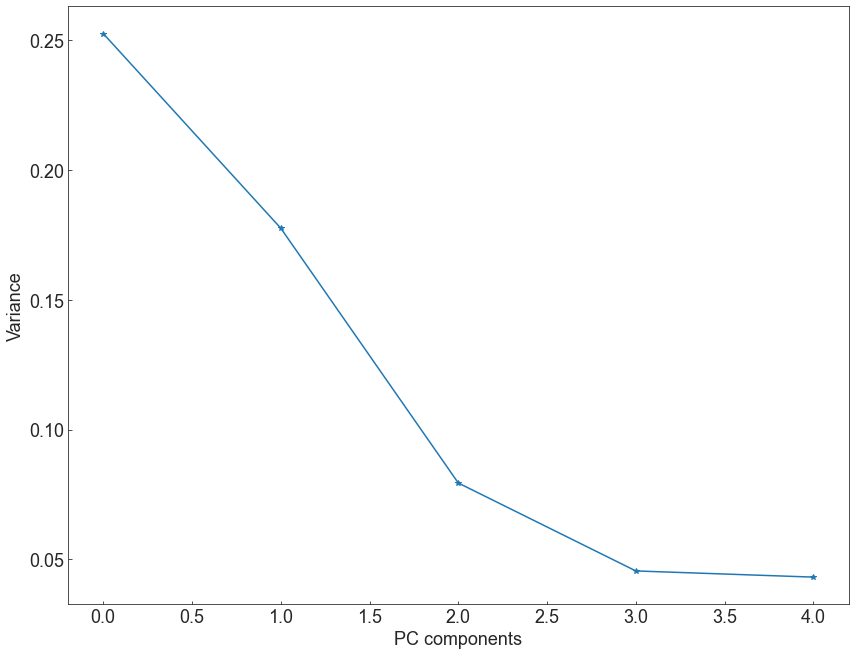

In [85]:
os.chdir(cwd)
directory='./PcaBasisFromAll'
if not os.path.exists(directory):
    os.mkdir(directory)
os.chdir(directory)
pca_obj14 = coor.pca(inp14, var_cutoff=0.95)
Ypca14 = pca_obj14.get_output()[0]
variance14 = pca_obj14.eigenvalues/sum(pca_obj14.eigenvalues)
print(variance14[0:5])
plot(variance14[0:5],'-*')
xlabel('PC components')
ylabel('Variance')

(<Figure size 1008x792 with 2 Axes>, <AxesSubplot:>)

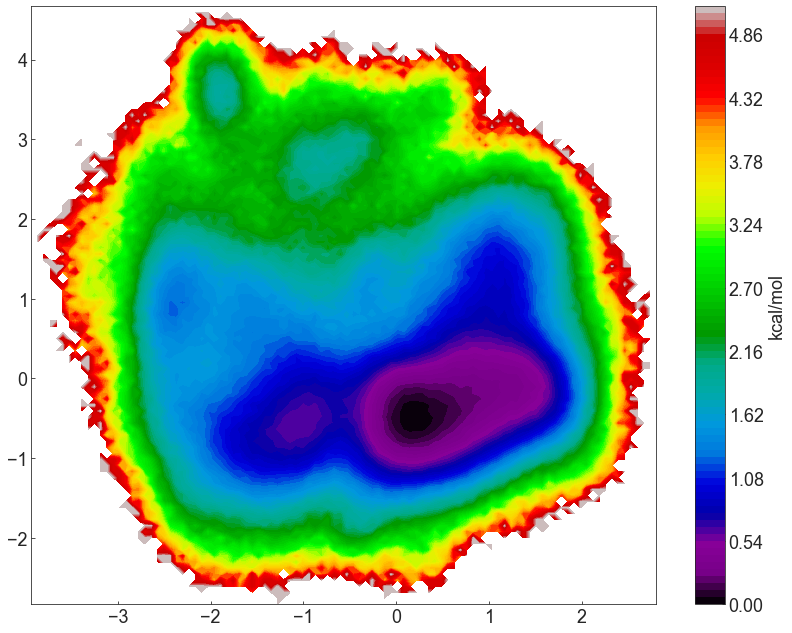

In [86]:
mplt.plot_free_energy(Ypca14[:,0], Ypca14[:,1], kT=0.593, cbar_label='kcal/mol')

In [87]:
path='./helix1ConnectionBetaSheet1/'
if not os.path.exists(path):
    os.mkdir(path)
pca_obj14.write_to_csv(os.path.join(path,'projection.txt'), '.txt')
np.savetxt(os.path.join(path,'variance.txt'),variance14,delimiter="\n")
np.save(os.path.join(path,'variance.npy'),variance14)
tmp14=np.loadtxt(os.path.join(path,'projection.txt'))
np.save(os.path.join(path,'projection.npy'),tmp14)

saving to csv:   0%|                                           | 0/20 [00:00<?, ?it/s]

In [88]:
# 30s Loop
feat15 = coor.featurizer(topfile)
thirtysLoop = feat15.select("(residue 55 to 62) and element != 'H'")
print('selection index:\n',thirtysLoop)
print('\nnumber of atoms:\n',len(thirtysLoop))
feat15.add_selection(thirtysLoop)
feat15.describe()[:10]

selection index:
 [833 835 837 840 841 843 845 847 849 851 852 853 855 857 860 863 866 868
 869 872 875 876 877 879 881 884 887 890 893 897 898 899 901 903 906 908
 909 910 911 914 916 919 922 923 924 926 928 931 934 935 936 939 940 941
 943 945 948 951 952 953 954 955 956 958 960 963 965 969 973 974]

number of atoms:
 70


['ATOM:PHE 55 N 833 1 x',
 'ATOM:PHE 55 N 833 1 y',
 'ATOM:PHE 55 N 833 1 z',
 'ATOM:PHE 55 CA 835 1 x',
 'ATOM:PHE 55 CA 835 1 y',
 'ATOM:PHE 55 CA 835 1 z',
 'ATOM:PHE 55 CB 837 1 x',
 'ATOM:PHE 55 CB 837 1 y',
 'ATOM:PHE 55 CB 837 1 z',
 'ATOM:PHE 55 CG 840 1 x']

In [89]:
inp15 = coor.source(trajfile, feat15)
inp15.get_output()
print('trajectory length = ',inp15.trajectory_length(0))
print('number of dimension = ',inp15.dimension())

getting output of FeatureReader:   0%|                         | 0/11 [00:00<?, ?it/s]

trajectory length =  3200000
number of dimension =  210


calc mean+cov:   0%|                                           | 0/11 [00:00<?, ?it/s]

getting output of PCA:   0%|                                   | 0/11 [00:00<?, ?it/s]

[0.31619811 0.12040398 0.09577906 0.06999554 0.05145002]


Text(0, 0.5, 'Variance')

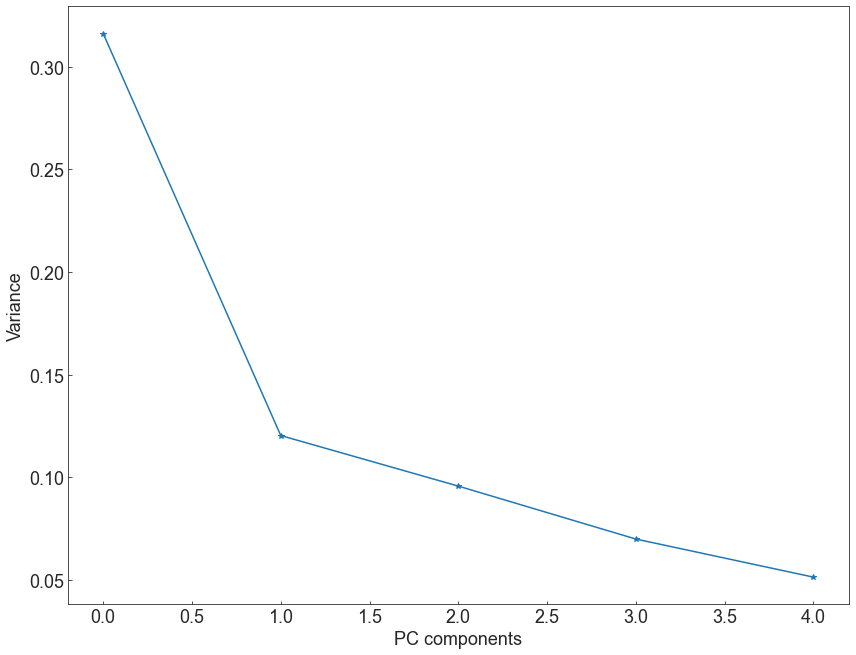

In [90]:
os.chdir(cwd)
directory='./PcaBasisFromAll'
if not os.path.exists(directory):
    os.mkdir(directory)
os.chdir(directory)
pca_obj15 = coor.pca(inp15, var_cutoff=0.95)
Ypca15 = pca_obj15.get_output()[0]
variance15 = pca_obj15.eigenvalues/sum(pca_obj15.eigenvalues)
print(variance15[0:5])
plot(variance15[0:5],'-*')
xlabel('PC components')
ylabel('Variance')

(<Figure size 1008x792 with 2 Axes>, <AxesSubplot:>)

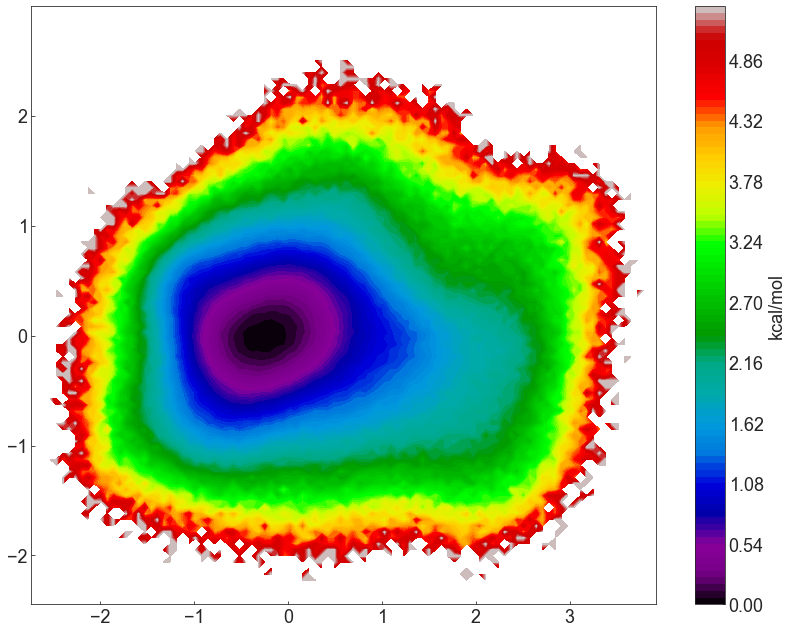

In [91]:
mplt.plot_free_energy(Ypca15[:,0], Ypca15[:,1], kT=0.593, cbar_label='kcal/mol')

In [92]:
path='./30sLoop/'
if not os.path.exists(path):
    os.mkdir(path)
pca_obj15.write_to_csv(os.path.join(path,'projection.txt'), '.txt')
np.savetxt(os.path.join(path,'variance.txt'),variance15,delimiter="\n")
np.save(os.path.join(path,'variance.npy'),variance15)
tmp15=np.loadtxt(os.path.join(path,'projection.txt'))
np.save(os.path.join(path,'projection.npy'),tmp15)

saving to csv:   0%|                                           | 0/11 [00:00<?, ?it/s]